# Exploratory analysis of lateral buds

## Frequency tables
- AIM1:create a frequency table per each class length
- AIM2:create a frequency table per each shoot type (prol/syl)
- AIM3: create a frequency table per rank node IN SYLLEPTIC

## Proleptic shoot type
- AIM1: discover where are sylleptic shoots (metamer level)
- AIM2: NB of observations (buds + sylleptic shoots) in proleptic 1yo shoots per CLASS LENGHT
- AIM3: NB of observations (buds + sylleptic shoots) in proleptic 1yo shoots per RANK
- AIM4: SUM of observations (buds + sylleptic shoots) in proleptic
- AIM5: how many m,v,b are per node in proleptic shoots
- AIM6: Proportion of buds (m+b+v) in proleptic 1yo shoots
- AIM7: Proportion of buds that sprout into shoots
- AIM8: Length of new shoots
- AIM9: Multiple shoots

data=shoots found in 2021 (Deruta)
Phd=Francesca Grisafi

In [1]:
import pandas as pd
import numpy as np
import importnb
import matplotlib.pyplot as plt
import sys
import matplotlib.ticker as ticker 

# Add the resolved path to sys.path
sys.path.insert(0, "../../../../Scripts")

# Import the notebooks
with importnb.Notebook():
    import Import_Dataset
    import Lateral_buds

In [2]:
file_paths = {
    'bud': "../../Data/bud.csv",
    'bud_proleptic': '../../Data/bud_proleptic.csv',
    'bud_sylleptic': '../../Data/bud_sylleptic.csv',
    'MV_bud_pro': '../../Data/MV_bud_pro.csv',
    'MV_bud_syl': '../../Data/MV_bud_syl.csv',
    'met_proleptic': '../../Data/met_proleptic.csv',
    'met_sylleptic': '../../Data/met_sylleptic.csv',
    'all_met_proleptic': '../../Data/all_met_proleptic.csv',
    'all_met_sylleptic': '../../Data/all_met_sylleptic.csv',
    'shoot': '../../Data/shoot.csv'
}

data = Import_Dataset.importdataset(**file_paths)

In [3]:
for name,dict_ in data.items():
    globals()[name] = dict_

## Frequency tables

### AIM1: create a frequency table per each class length

In [4]:
class_length = Lateral_buds.freq_table_class_length(bud, "class", "fate", "length_newshoots",
                                      "nb_new_shoots", "shoot_ID")
print(class_length)

     nb_shoots  tot_buds_m_v_b_c  nb_new_shoots    V   B   C    M  \
VLo         25               671            442  284  33  71  283   
Lo          28               577            348  212  36  88  241   
Me          25               296            133   92  37  48  119   
Sh          26               133             65   55  18  24   36   

     new_shoot_VLo  new_shoot_Lo  new_shoot_Me  new_shoot_Sh  
VLo              1             4            55           382  
Lo               0             1            23           324  
Me               0             0             7           126  
Sh               0             0             4            61  


### AIM2: create a frequency table per each shoot type (prol/syl) 

In [5]:
shoot_type_summary = Lateral_buds.freq_table_prol_syl(bud, "shoot_type", "fate",
                                         "nb_new_shoots", "shoot_ID")
print(shoot_type_summary)

  shoot_type  nb_shoots  buds_from_M  buds_from_V  new_shoot_from_V  \
0  PROLEPTIC        104          429          371               281   
1  SYLLEPTIC         88          250          272               165   

   new_shoot_from_B  new_shoot_from_C  new_shoot_from_M  nb_new_shoots  \
0                24                 0               379            684   
1                 0                23               116            304   

   bud_burst    errors  
0   0.825000  0.035088  
1   0.538314  0.075658  


### AIM3: create a frequency table per each rank node IN SYLLEPTIC

In [6]:
tab_syl = Lateral_buds.freq_buds_in_rank_sylleptic(met_sylleptic, 'parent_rank_node', 'c_syl', 'v_syl', 'm_syl', 'b')
print(tab_syl.head())

  rank_node nb_shoots c_syl v_syl m_syl  b sums  %C_SYL  %V_SYL  %M_SYL   %B
1         1         3     3     0     0  0    3   100.0    0.00    0.00  0.0
2         2        11    11     8     9  0   28   100.0   72.73   81.82  0.0
3         3        19    19    21    12  0   52   100.0  110.53   63.16  0.0
4         4        25    25    29    21  0   75   100.0  116.00   84.00  0.0
5         5        46    46    66    69  0  181   100.0  143.48  150.00  0.0


## PROLEPTIC SHOOT TYPE

### AIM1: discover where are sylleptic shoots (metamer level)

In [7]:
print(met_proleptic.columns)

Index(['tesi', 'unit', 'length', 'unit_2', 'diam', 'class', 'shoot_ID', 'tree',
       'Length(node)', 'rank_node', 'median_distance', 'norm_median_distance',
       'abs_norm_median_distance', 'abs_median_distance', 'sylleptic', 'v',
       'm', 'cl', 'nu', 'b', 'tot_buds_mvb', 'tot_buds_mv', 'shoot_type',
       'nb_new_shoots', 'c_syl', 'v_syl', 'm_syl', 'tot_buds_syl_m_v',
       'tot_buds_m_v_b_c'],
      dtype='object')


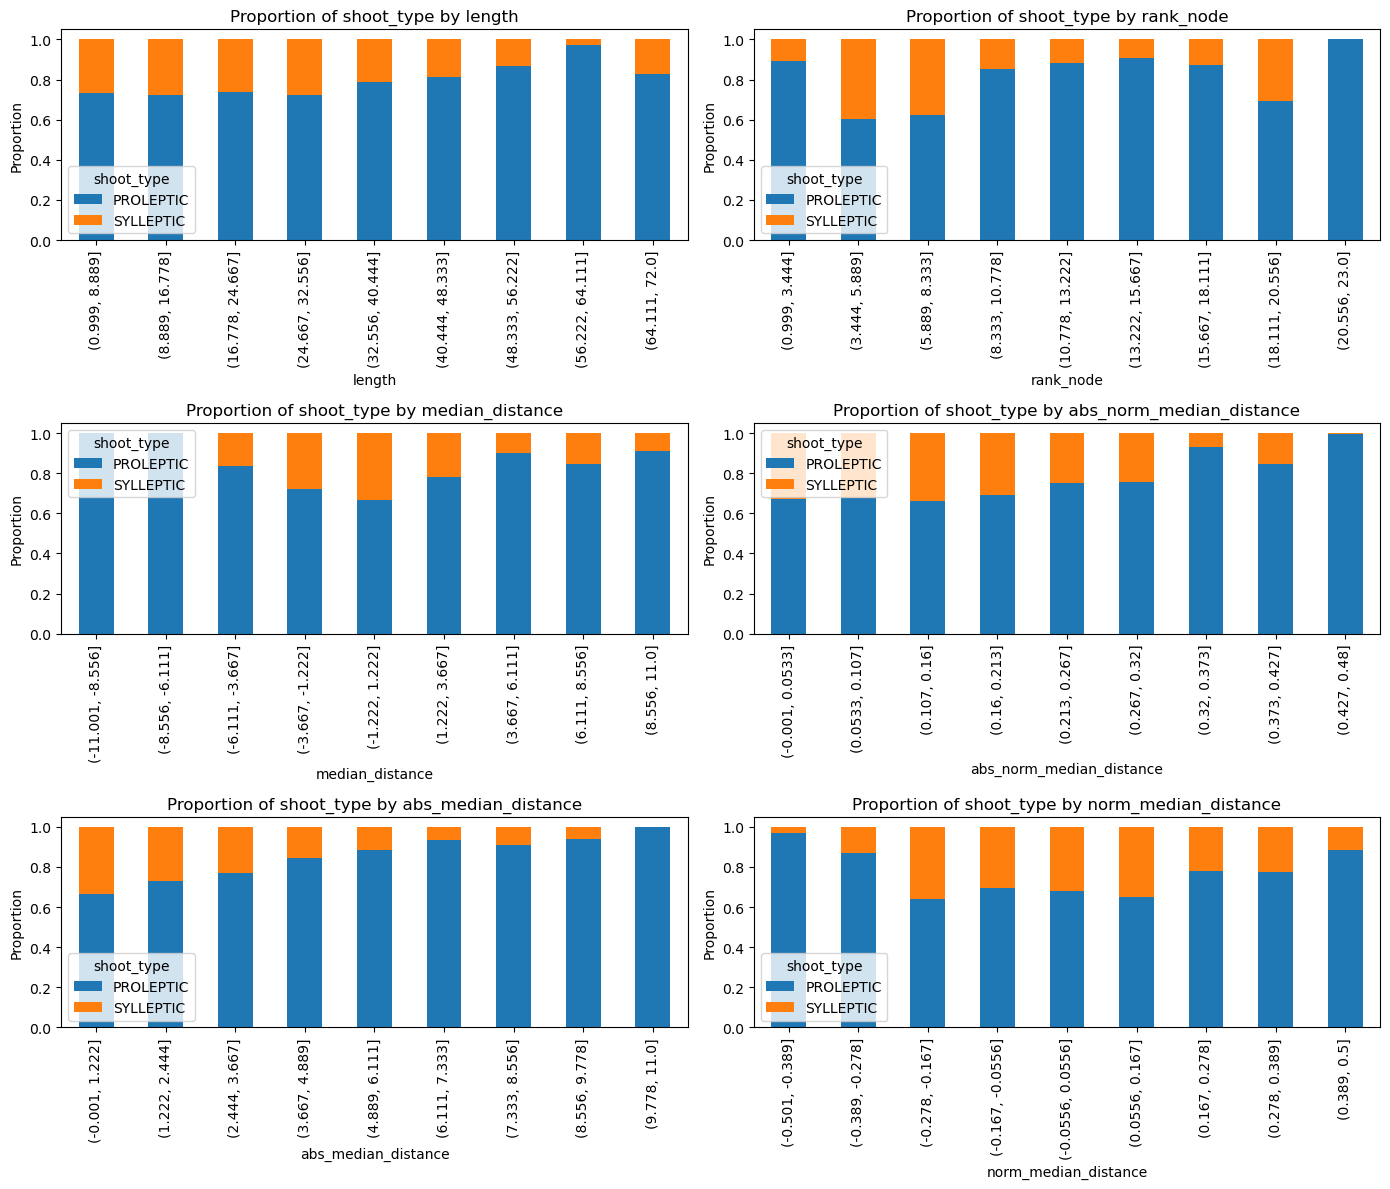

In [8]:
# Creazione di subplot per ciascun x_var
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
x_vars = ['length', 'rank_node', 'median_distance', 'abs_norm_median_distance', 'abs_median_distance', 'norm_median_distance']

for ax, x_var in zip(axes.flatten(), x_vars):
    Lateral_buds.plot_proportion(met_proleptic, x_var, 'shoot_type', ax)

plt.tight_layout()
plt.show()

###  AIM2: NB of observations (buds + sylleptic shoots) in proleptic 1yo shoots per CLASS LENGHT 

In [9]:
class_summary = Lateral_buds.calculate_class_summary(met_proleptic, 'class', ['sylleptic', 'v', 'm', 'b'])
# Define the custom order for 'class'
class_order = ['Sh', 'Me', 'Lo', 'VLo']

# Create a categorical type with the custom order
class_summary['class'] = pd.Categorical(class_summary['class'], categories=class_order, ordered=True)

# Sort the DataFrame by 'class' according to the categorical order
class_summary = class_summary.sort_values('class')
print(class_summary)

  class  sylleptic    v    m   b  Total  %sylleptic         %v         %m  \
3    Sh         24   40   24  18    106   22.641509  37.735849  22.641509   
2    Me         48   44   56  37    185   25.945946  23.783784  30.270270   
1    Lo         88  103  156  36    383   22.976501  26.892950  40.731070   
0   VLo         71  184  193  33    481   14.760915  38.253638  40.124740   

          %b  
3  16.981132  
2  20.000000  
1   9.399478  
0   6.860707  



Testing column: %sylleptic
Comparison between 3 and 2: p-value = 0.10640901836553508
Comparison between 3 and 1: p-value = 1.4910812169219537e-06
Comparison between 3 and 0: p-value = 2.966337069860781e-12
Comparison between 2 and 1: p-value = 0.0013981684525640197
Comparison between 2 and 0: p-value = 1.2463579466624618e-07
Comparison between 1 and 0: p-value = 0.03629543161695097

Testing column: %v
Comparison between 3 and 2: p-value = 4.815960233771163e-06
Comparison between 3 and 1: p-value = 1.4858198212051288e-14
Comparison between 3 and 0: p-value = 1.649360574056811e-14
Comparison between 2 and 1: p-value = 0.022255135860656777
Comparison between 2 and 0: p-value = 0.051173398098504616
Comparison between 1 and 0: p-value = 0.6065339160008028

Testing column: %m
Comparison between 3 and 2: p-value = 0.2874834550195694
Comparison between 3 and 1: p-value = 0.0036179724450169813
Comparison between 3 and 0: p-value = 8.633121337358471e-05
Comparison between 2 and 1: p-value = 0.0

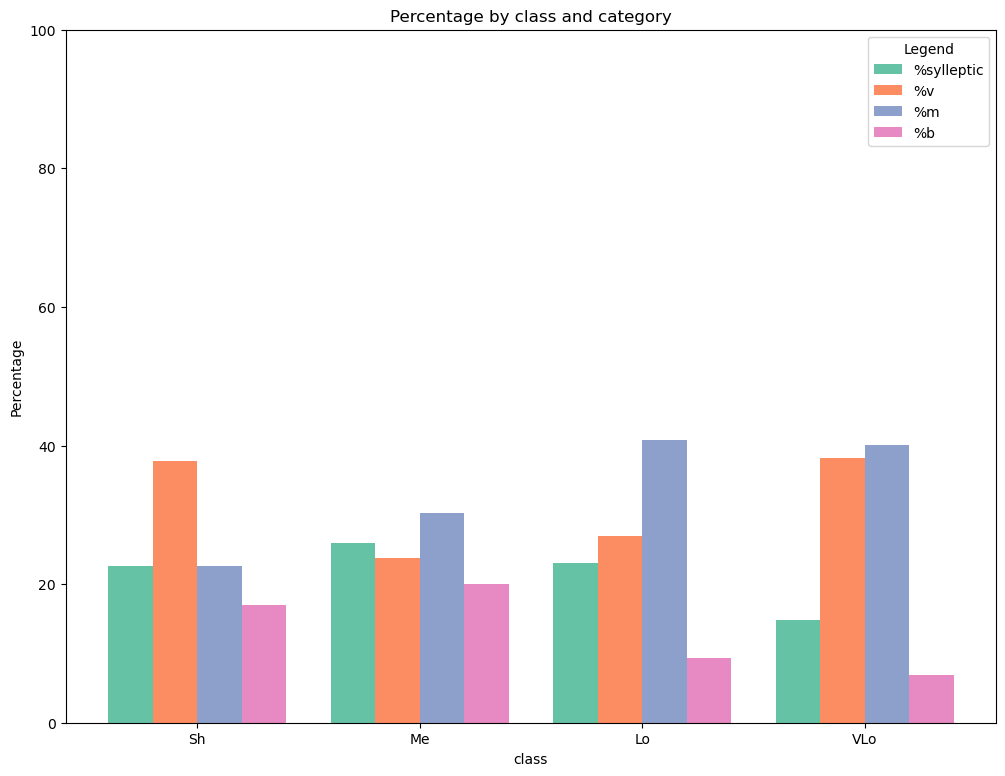

In [10]:
# 2_PRO_freq_obs~class
Lateral_buds.plot_and_test(class_summary, row_slice=slice(0,4), col_slice=slice(6,10), obs_col_index=5,
               plot_title='Nb Lateral Buds or Shoot Class', xlabel='class', ylabel='Percentage', ymax = 100)

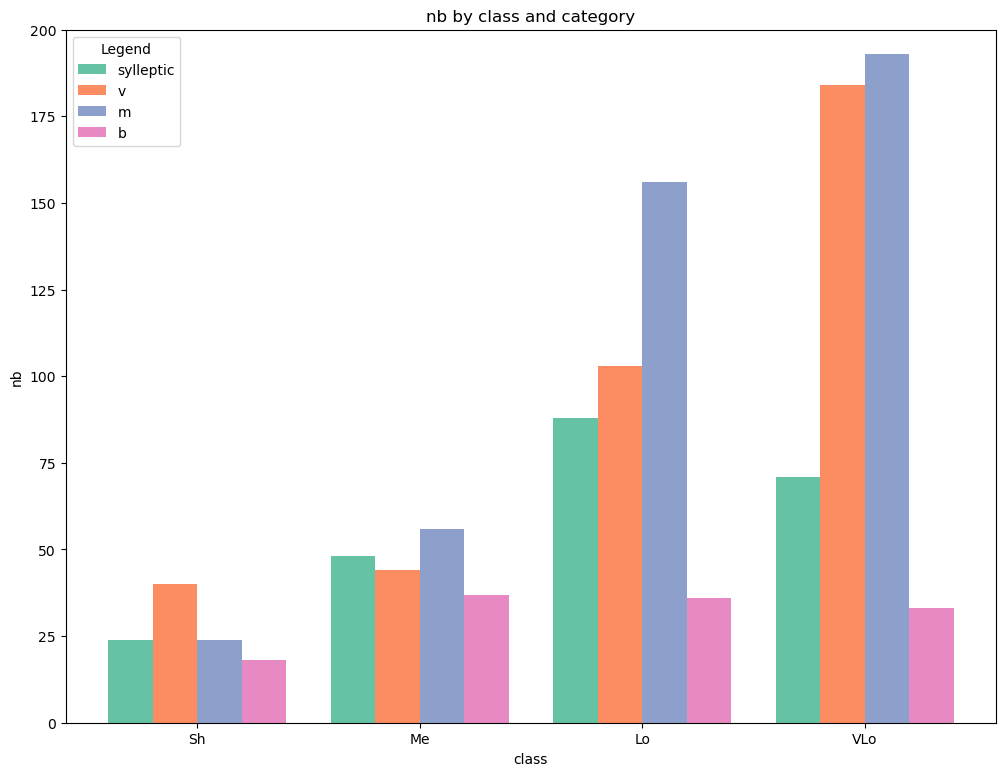

In [11]:
# 2_PRO_nb_obs~class
Lateral_buds.plot_and_test(class_summary, row_slice=slice(0,4), col_slice=slice(1,5), obs_col_index=5,
               plot_title='Nb Lateral Buds or Shoot Class', xlabel='class', ylabel='nb', ymax = 200, test = False)

In [12]:
# Assuming the 'Total' column should be the sum of the previous four columns
class_summary.loc['Sum'] = class_summary.iloc[:, 1:].sum(axis=0)
print(class_summary)
relative_frequency = class_summary.iloc[4:,1:5] / class_summary.loc['Sum', 'Total']*100
print(relative_frequency)
class_summary.iloc[4:,6:10] = relative_frequency

    class  sylleptic      v      m      b   Total  %sylleptic          %v  \
3      Sh       24.0   40.0   24.0   18.0   106.0   22.641509   37.735849   
2      Me       48.0   44.0   56.0   37.0   185.0   25.945946   23.783784   
1      Lo       88.0  103.0  156.0   36.0   383.0   22.976501   26.892950   
0     VLo       71.0  184.0  193.0   33.0   481.0   14.760915   38.253638   
Sum   NaN      231.0  371.0  429.0  124.0  1155.0   86.324871  126.666221   

             %m         %b  
3     22.641509  16.981132  
2     30.270270  20.000000  
1     40.731070   9.399478  
0     40.124740   6.860707  
Sum  133.767590  53.241317  
     sylleptic          v          m          b
Sum       20.0  32.121212  37.142857  10.735931


C:\Users\franc\AppData\Local\Temp\ipykernel_12280\83787131.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  class_summary.loc['Sum'] = class_summary.iloc[:, 1:].sum(axis=0)


In [13]:
df_plot = class_summary.iloc[4:,6:10]
df_plot = df_plot.T
print(df_plot)

                  Sum
%sylleptic  20.000000
%v          32.121212
%m          37.142857
%b          10.735931


C:\Users\franc\Desktop\Ricerca\Progetti\L-HAZELNUT\L-HAZELNUT\Cultivars\TondaGiffoniOR\Scripts\Exploratory_analyses\../../../../Scripts\Lateral_buds.ipynb:293: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x[i], df.iloc[i,:] + 3, f"{round(df.iloc[i,:][0],2)}", ha='center')
C:\Users\franc\miniconda3\lib\site-packages\matplotlib\text.py:825: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
C:\Users\franc\miniconda3\lib\site-packages\matplotlib\text.py:685: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(textobj.convert_yunits(textobj._y))


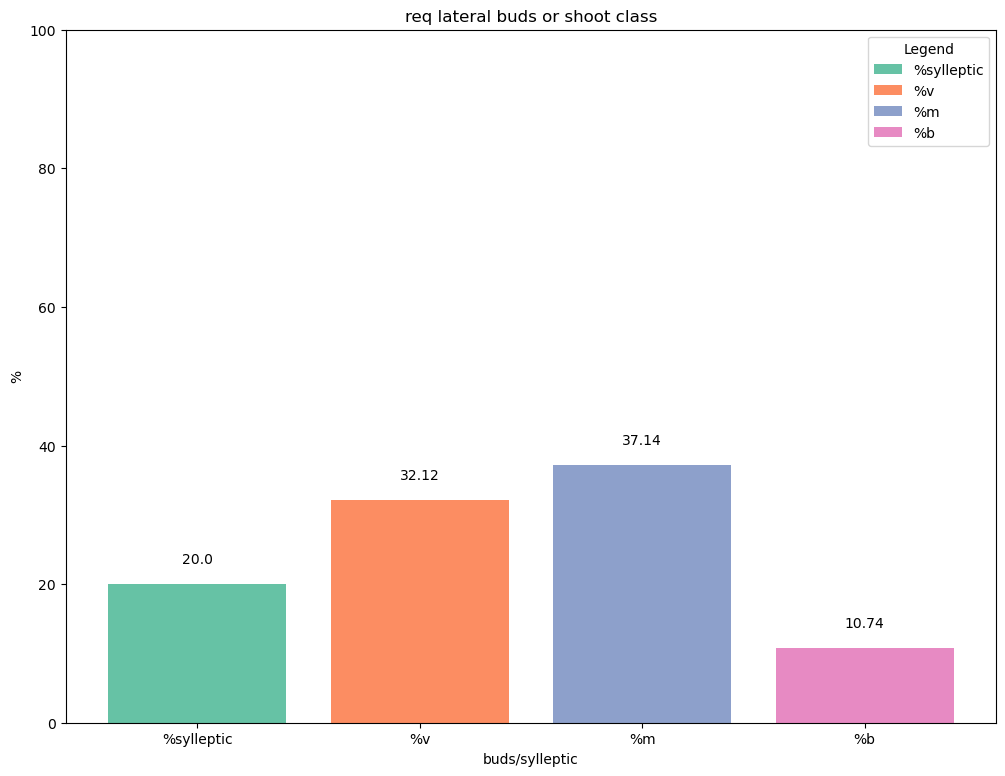

In [14]:
# PRO_nb_obs
Lateral_buds.barplot_annotation(df_plot, "buds/sylleptic", "req lateral buds or shoot class")

### AIM3: NB of observations (buds + sylleptic shoots) in proleptic 1yo shoots per RANK

In [15]:
class_rank = Lateral_buds.process_rank_data(met_proleptic)
class_rank.head()

,rank_node,nb_shoots,sylleptic,v,m,b,sum_obs
1,1,104,3,53,20,28,104
2,2,103,11,39,19,38,107
3,3,99,19,29,21,36,105
4,4,93,25,31,37,15,108
5,5,85,46,22,31,3,102


In [16]:
class_rank = Lateral_buds.calculate_relative_frequencies(class_rank)
class_rank.head()

,rank_node,nb_shoots,sylleptic,v,m,b,sum_obs,%SYLLEPTIC,%V,%M,%B
1,1,104,3,53,20,28,104,2.88,50.96,19.23,26.92
2,2,103,11,39,19,38,107,10.28,36.45,17.76,35.51
3,3,99,19,29,21,36,105,18.10,27.62,20.00,34.29
4,4,93,25,31,37,15,108,23.15,28.70,34.26,13.89
5,5,85,46,22,31,3,102,45.10,21.57,30.39,2.94


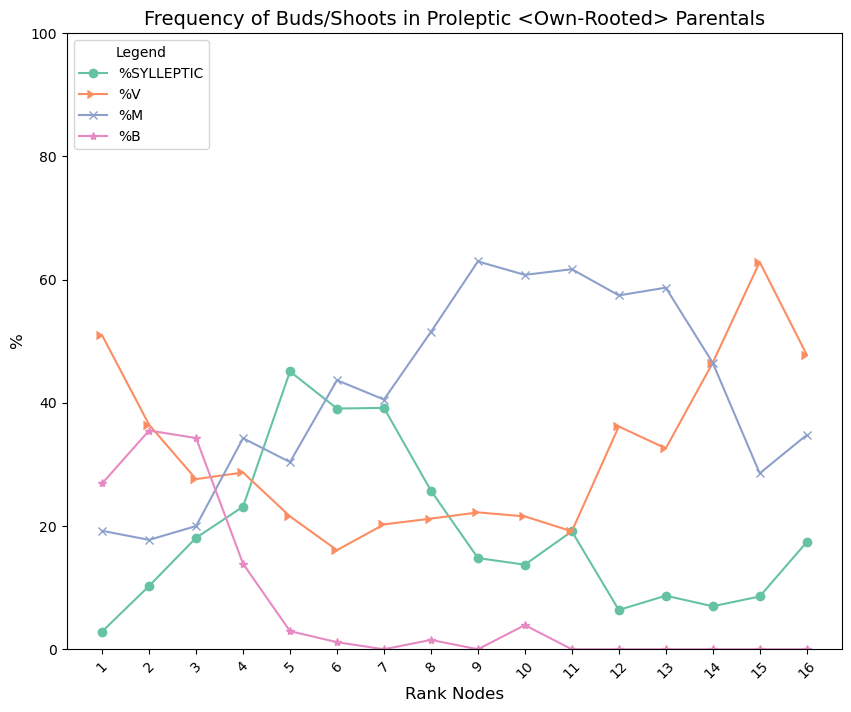

In [17]:
Lateral_buds.plot_rank_data(class_rank, 0, 16)

### AIM4: SUM of observations (buds + sylleptic shoots) in proleptic

In [18]:
freq_rank = pd.crosstab(index=met_proleptic['rank_node'], columns=met_proleptic['tot_buds_m_v_b_c'])

freq_rank.head()

tot_buds_m_v_b_c,1,2,3,4,5,6,7,8,9
rank_node,,,,,,,,,
1,104,0,0,0,0,0,0,0,0
2,92,6,2,1,2,0,0,0,0
3,78,9,7,4,1,0,0,0,0
4,61,12,11,7,1,0,1,0,0
5,33,9,9,22,4,7,0,0,1


<Figure size 1200x900 with 0 Axes>

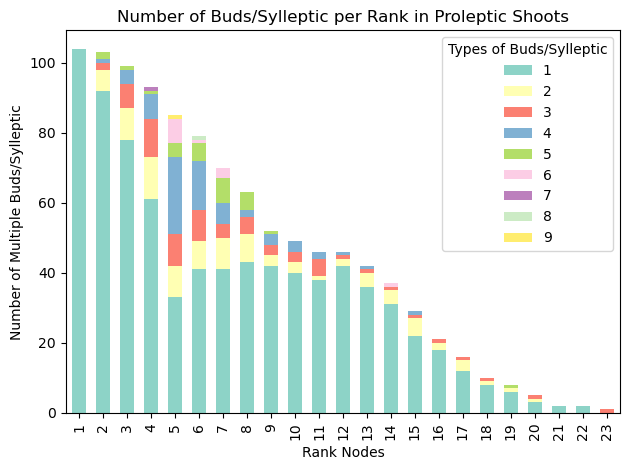

In [19]:
# Create colormap for the bar chart
num_colors = len(freq_rank.columns)
set3_colors = plt.cm.get_cmap('Set3', num_colors)  # Get colors from Set3
colors = set3_colors(np.linspace(0, 1, num_colors))  # Evenly space color pick

Lateral_buds.plot_stacked_barchart(freq_rank, colors)

In [20]:
rel_freq_rank = (freq_rank.div(freq_rank.sum(axis=1), axis=0) * 100).fillna(0)
rel_freq_rank.head()

tot_buds_m_v_b_c,1,2,3,4,5,6,7,8,9
rank_node,,,,,,,,,
1,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,89.320388,5.825243,1.941748,0.970874,1.941748,0.000000,0.000000,0.0,0.000000
3,78.787879,9.090909,7.070707,4.040404,1.010101,0.000000,0.000000,0.0,0.000000
4,65.591398,12.903226,11.827957,7.526882,1.075269,0.000000,1.075269,0.0,0.000000
5,38.823529,10.588235,10.588235,25.882353,4.705882,8.235294,0.000000,0.0,1.176471


<Figure size 1200x900 with 0 Axes>

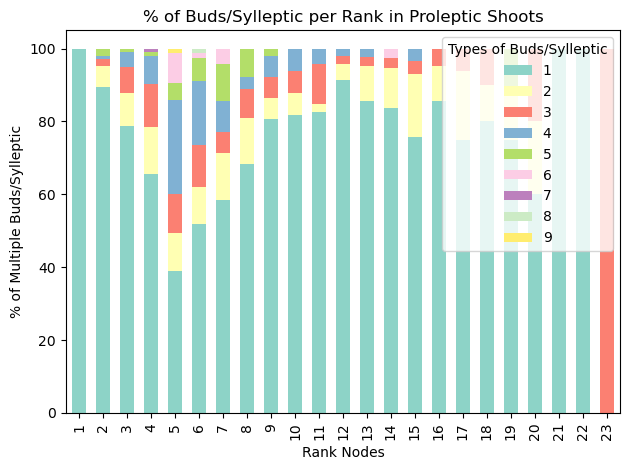

In [21]:
Lateral_buds.plot_stacked_barchart(rel_freq_rank,colors,
                      title="% of Buds/Sylleptic per Rank in Proleptic Shoots", xlabel="Rank Nodes", ylabel="% of Multiple Buds/Sylleptic")

In [22]:
tot = ["sylleptic", "v", "m", "b"]
frequency_table = Lateral_buds.process_and_tabulate(met_proleptic, tot)

In [23]:
print(frequency_table.head())  # You can adjust the number of lines as needed

merge       b   m  m+m  m+m+m+m  sylleptic   v  v+m  v+m+m  v+m+m+m  v+v  \
rank_node                                                                  
1          28  20    0        0          3  53    0      0        0    0   
2          38  17    0        0         11  35    0      0        0    1   
3          36  18    0        0         19  21    2      0        0    2   
4          15  24    2        0         25  19    3      1        1    1   
5           3  19    0        0         46  10    2      1        1    2   

merge      v+v+m  v+v+m+m  v+v+v  v+v+v+v+m+m+m+m+m  
rank_node                                            
1              0        0      0                  0  
2              0        1      0                  0  
3              1        0      0                  0  
4              1        0      1                  0  
5              0        0      0                  1  


<Figure size 1200x900 with 0 Axes>

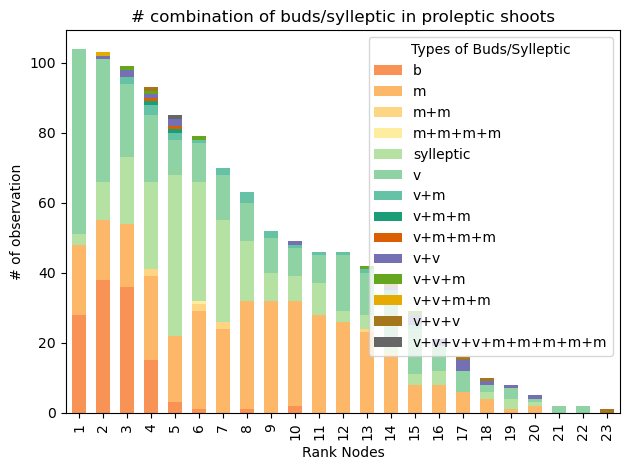

In [24]:
# Define custom colors by combining colors from different colormaps
spectral_colors = plt.get_cmap('Spectral')(np.linspace(0.2, 0.8, 11))  # Adjusted to get 11 colors and sliced
dark2_colors = plt.get_cmap('Dark2')(np.linspace(0, 1, 7))
# Custom selection and combination of colors from both palettes
colors = np.concatenate((spectral_colors[1:5], spectral_colors[8:11], dark2_colors[:7]))

Lateral_buds.plot_stacked_barchart(frequency_table,colors,
                      title="# combination of buds/sylleptic in proleptic shoots", xlabel="Rank Nodes", ylabel="# of observation")

In [25]:
contingency_table = pd.crosstab(met_proleptic['rank_node'], met_proleptic['merge'])

# Step 2: Convert the counts to relative frequencies (percentages)
# Normalize row-wise by dividing each row by its sum and then multiply by 100
relative_frequencies = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

relative_frequencies.head()

merge,b,m,m+m,m+m+m+m,sylleptic,v,v+m,v+m+m,v+m+m+m,v+v,v+v+m,v+v+m+m,v+v+v,v+v+v+v+m+m+m+m+m
rank_node,,,,,,,,,,,,,,
1,26.923077,19.230769,0.000000,0.0,2.884615,50.961538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,36.893204,16.504854,0.000000,0.0,10.679612,33.980583,0.000000,0.000000,0.000000,0.970874,0.000000,0.970874,0.000000,0.000000
3,36.363636,18.181818,0.000000,0.0,19.191919,21.212121,2.020202,0.000000,0.000000,2.020202,1.010101,0.000000,0.000000,0.000000
4,16.129032,25.806452,2.150538,0.0,26.881720,20.430108,3.225806,1.075269,1.075269,1.075269,1.075269,0.000000,1.075269,0.000000
5,3.529412,22.352941,0.000000,0.0,54.117647,11.764706,2.352941,1.176471,1.176471,2.352941,0.000000,0.000000,0.000000,1.176471


<Figure size 1200x900 with 0 Axes>

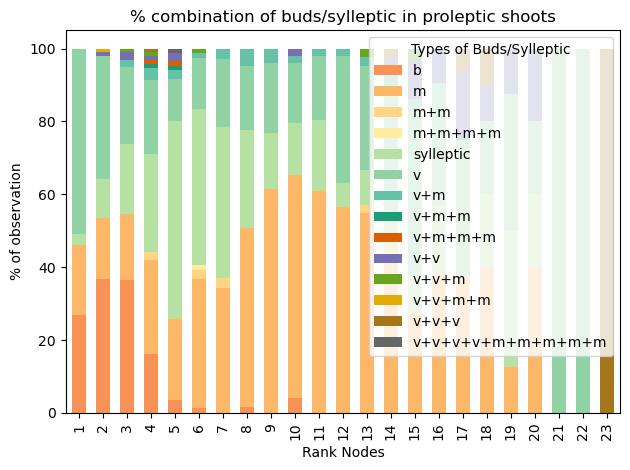

In [26]:
Lateral_buds.plot_stacked_barchart(relative_frequencies,colors,
                      title="% combination of buds/sylleptic in proleptic shoots", xlabel="Rank Nodes", ylabel="% of observation")

### AIM5: how many m,v,b are per node in proleptic shoots

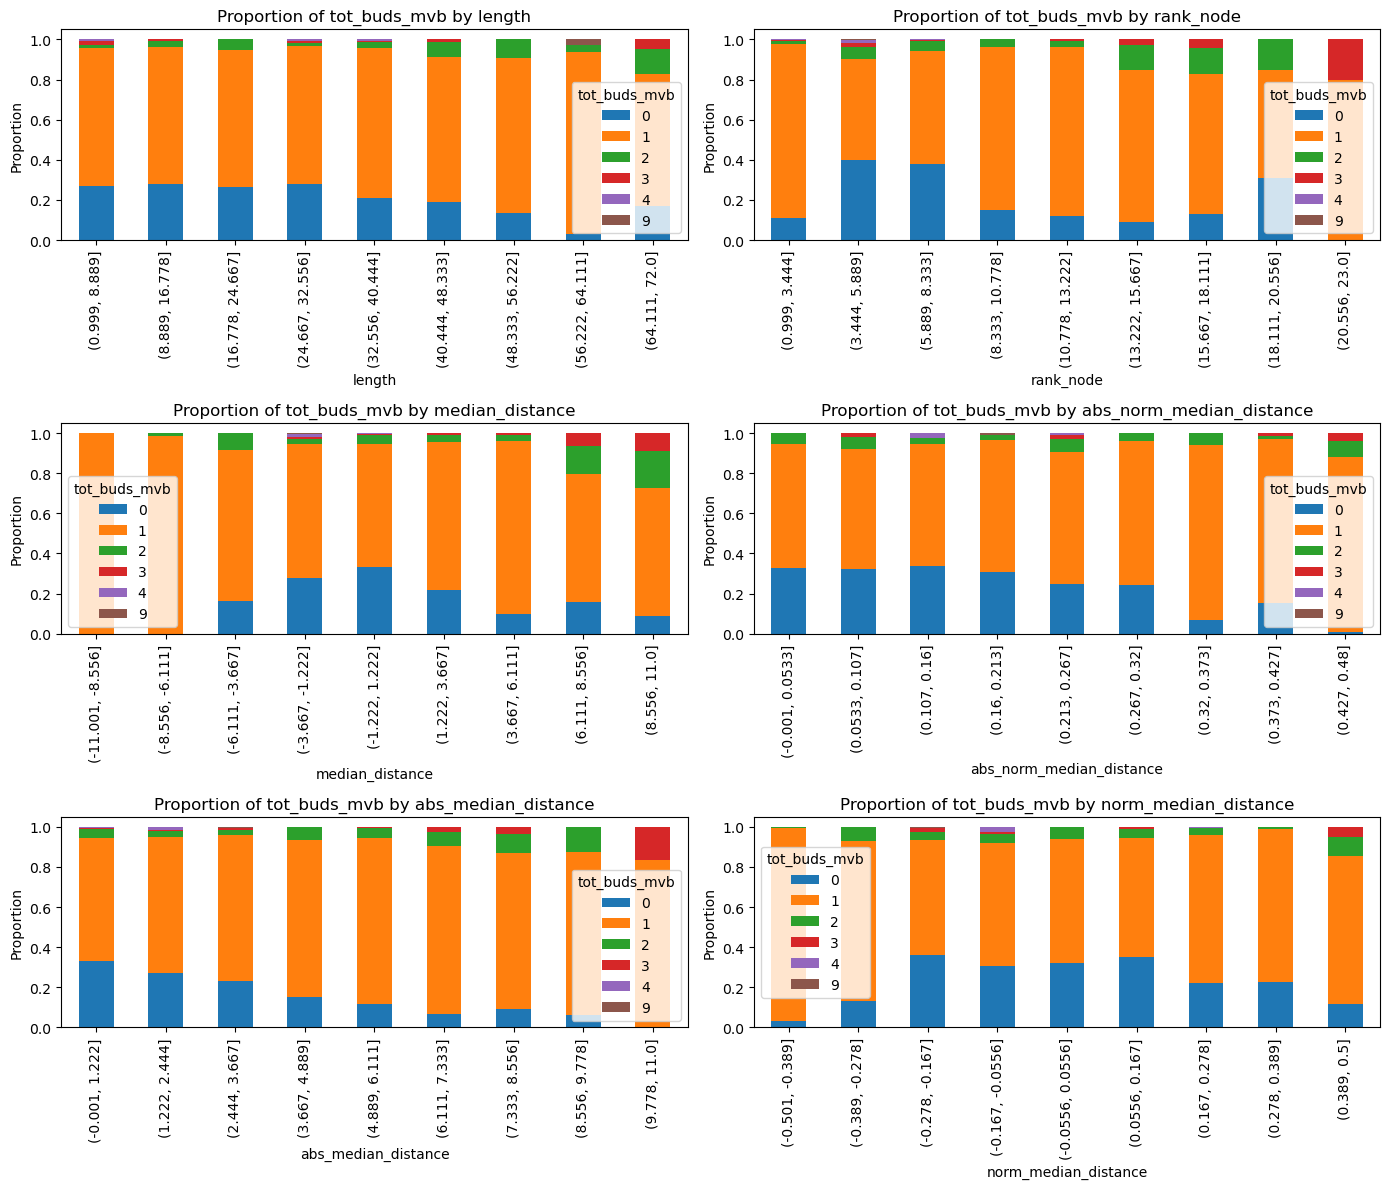

In [27]:
# Creazione di subplot per ciascun x_var
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
x_vars = ['length', 'rank_node', 'median_distance', 'abs_norm_median_distance', 'abs_median_distance', 'norm_median_distance']

for ax, x_var in zip(axes.flatten(), x_vars):
    Lateral_buds.plot_proportion(met_proleptic, x_var, 'tot_buds_mvb', ax)

plt.tight_layout()
plt.show()

### AIM6: Proportion of buds (m+b+v) in proleptic 1yo shoots

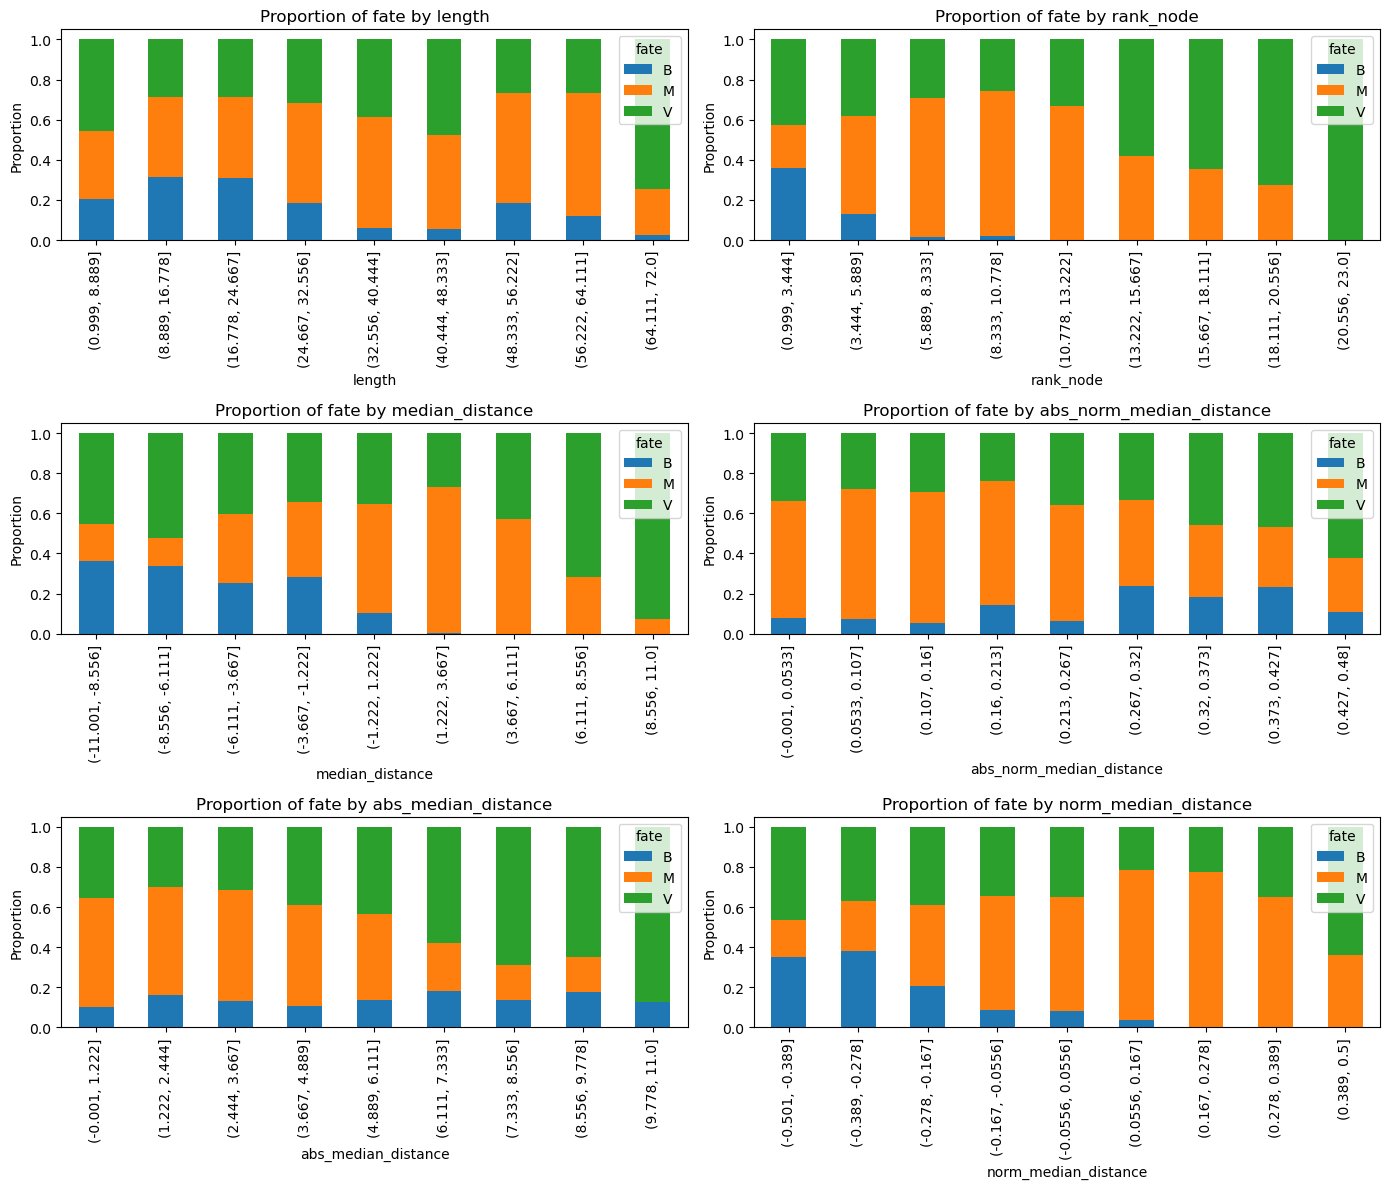

In [28]:
# Creazione di subplot per ciascun x_var
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
x_vars = ['length', 'rank_node', 'median_distance', 'abs_norm_median_distance', 'abs_median_distance', 'norm_median_distance']

for ax, x_var in zip(axes.flatten(), x_vars):
    Lateral_buds.plot_proportion(bud_proleptic, x_var, 'fate', ax)

plt.tight_layout()
plt.show()

### AIM7: Proportion of buds that sprout into shoots

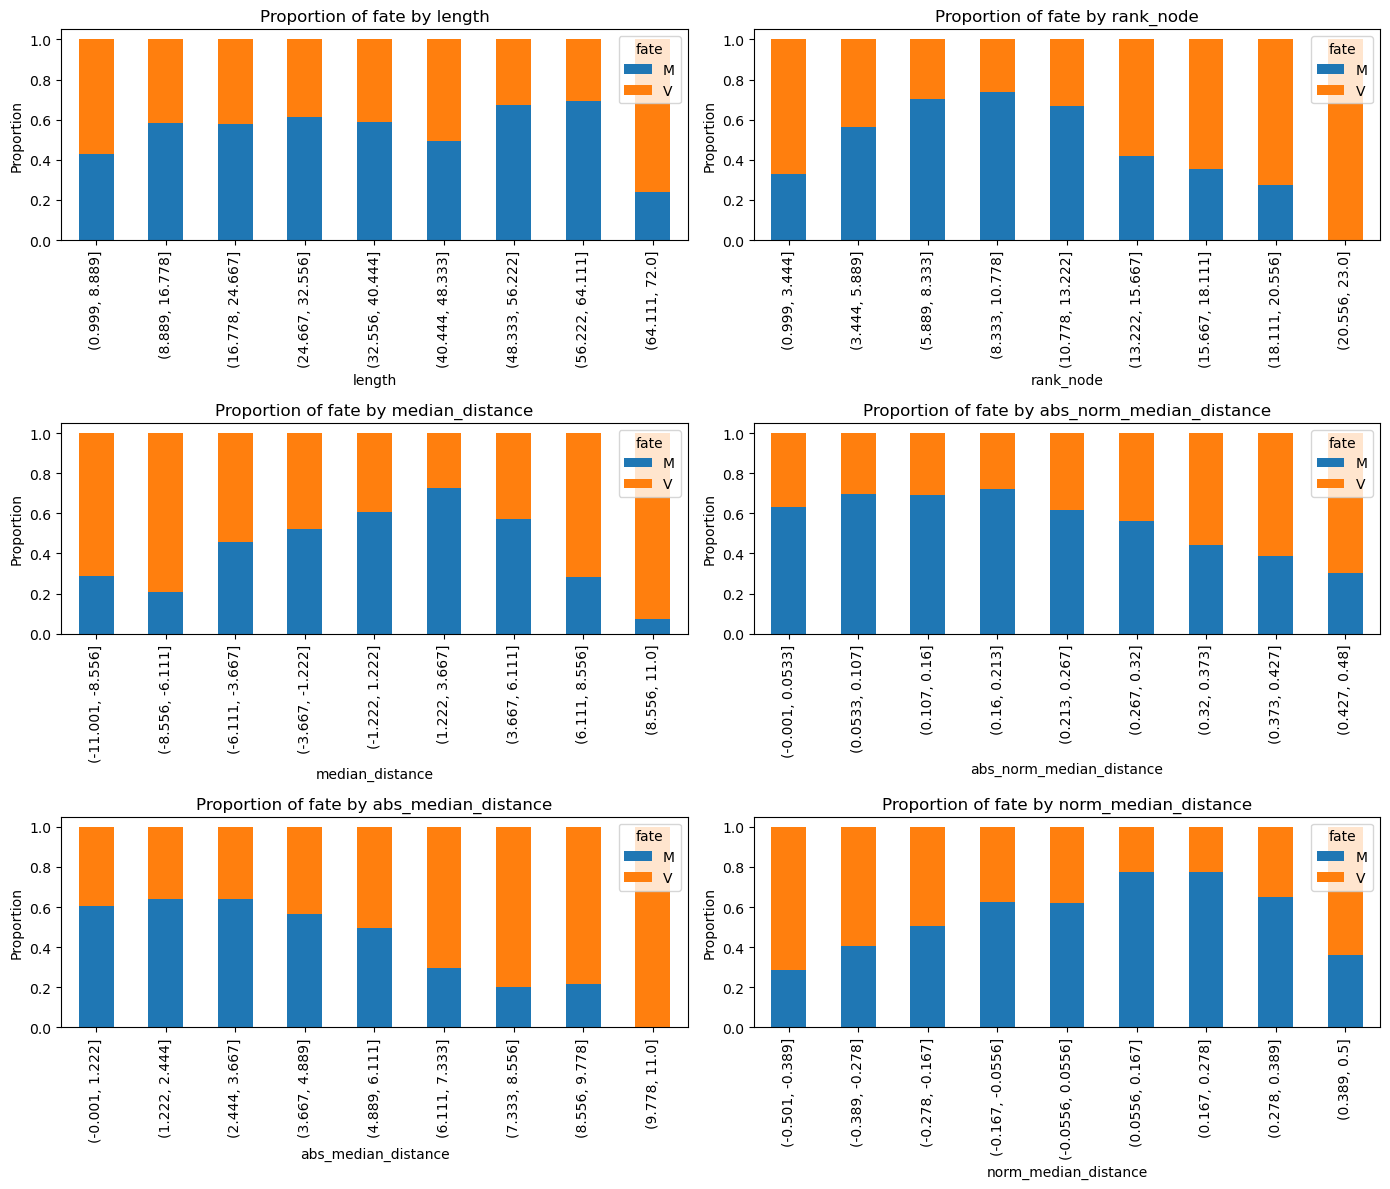

In [29]:
# Creazione di subplot per ciascun x_var
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
x_vars = ['length', 'rank_node', 'median_distance', 'abs_norm_median_distance', 'abs_median_distance', 'norm_median_distance']

for ax, x_var in zip(axes.flatten(), x_vars):
    Lateral_buds.plot_proportion(MV_bud_PRO, x_var, 'fate', ax)

plt.tight_layout()
plt.show()

In [30]:
contingency_table = pd.crosstab(index=[MV_bud_PRO['rank_node'], MV_bud_PRO['fate']], columns=MV_bud_PRO['nb_new_shoots'])

# Filter to get rows where fate is 'M'
from_M = contingency_table.xs('M', level='fate')
from_V = contingency_table.xs('V', level='fate')

# Calculate relative frequencies per rank node for each fate
from_M_freq = from_M.div(from_M.sum(axis=1), axis=0)
from_V_freq = from_V.div(from_V.sum(axis=1), axis=0)

In [31]:
from_M_freq = from_M_freq[1]*100  # Extract the column for nb_new_shoots=1
from_V_freq = from_V_freq[1]*100  # Extract the column for nb_new_shoots=1

In [32]:
# Combine the frequencies into a single DataFrame
from_MV_freq = pd.DataFrame({'V': from_V_freq, 'M': from_M_freq})

# Reset index to make 'rank_node' and 'nb_new_shoots' regular columns
from_MV_freq.reset_index(inplace=True)

# Print the resulting frequency matrix
print(from_MV_freq.head())

   rank_node          V          M
0          1  41.509434  60.000000
1          2  71.794872  84.210526
2          3  75.862069  85.714286
3          4  74.193548  70.270270
4          5  68.181818  80.645161


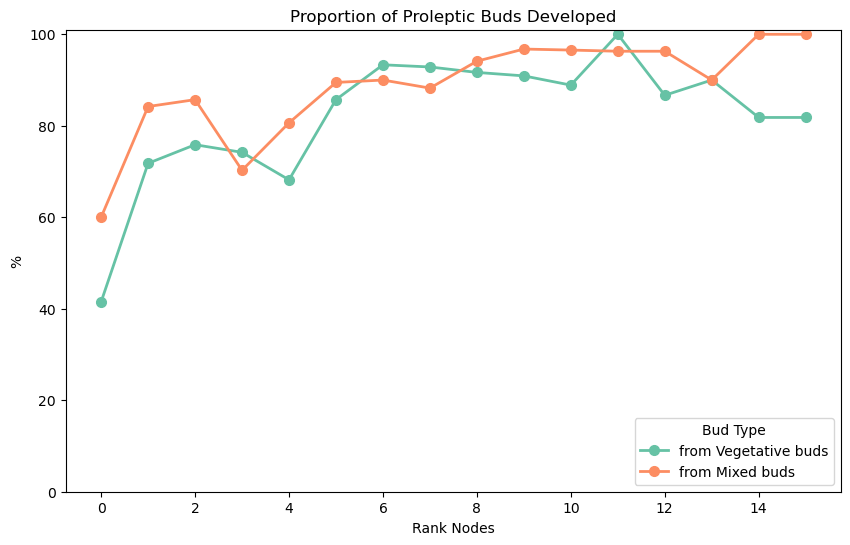

In [33]:
Lateral_buds.plot_bud_development(from_MV_freq)

### AIM8: Length of new shoots

In [34]:
# Filter rows where nb_new_shoots is not equal to 0
new_shoots = MV_bud_PRO[MV_bud_PRO['nb_new_shoots'] != 0]
# Create a frequency table
new_shoots_rank = pd.crosstab([new_shoots['rank_node'], new_shoots['length_newshoots']], new_shoots['fate'])

print(new_shoots_rank.head())

fate                         M   V
rank_node length_newshoots        
1         Sh                12  22
2         Me                 1   0
          Sh                15  28
3         Me                 0   1
          Sh                18  21


In [35]:
# Developed from V
fromV = new_shoots_rank.loc[:, 'V']
fromV_matrix = fromV.unstack().fillna(0)
# Calculate the relative frequency table
fromV_freq = fromV_matrix.div(fromV_matrix.sum(axis=1), axis=0) * 100

print("matrix:\n",fromV_matrix.head())
print("\n relative freq:\n", fromV_freq.head())

matrix:
 length_newshoots   Lo   Me    Sh  VLo
rank_node                            
1                 0.0  0.0  22.0  0.0
2                 0.0  0.0  28.0  0.0
3                 0.0  1.0  21.0  0.0
4                 0.0  2.0  21.0  0.0
5                 0.0  0.0  15.0  0.0

 relative freq:
 length_newshoots   Lo        Me          Sh  VLo
rank_node                                       
1                 0.0  0.000000  100.000000  0.0
2                 0.0  0.000000  100.000000  0.0
3                 0.0  4.545455   95.454545  0.0
4                 0.0  8.695652   91.304348  0.0
5                 0.0  0.000000  100.000000  0.0


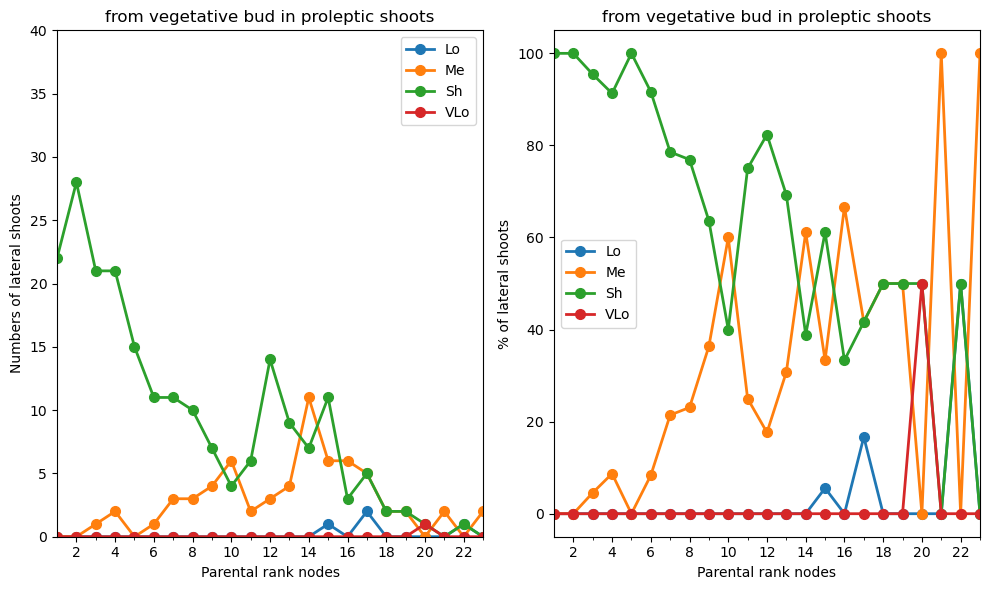

In [36]:
Lateral_buds.developinprol(fromV_matrix,fromV_freq,"vegetative" ,(1,23), (0,40))

In [37]:
# Developed from M
fromM = new_shoots_rank.loc[:, 'M']
fromM_matrix = fromM.unstack().fillna(0)
# Calculate the relative frequency table
fromM_freq = fromM_matrix.div(fromM_matrix.sum(axis=1), axis=0) * 100

print("matrix:\n",fromM_matrix.head())
print("\n relative freq:\n", fromM_freq.head())

matrix:
 length_newshoots   Lo   Me    Sh  VLo
rank_node                            
1                 0.0  0.0  12.0  0.0
2                 0.0  1.0  15.0  0.0
3                 0.0  0.0  18.0  0.0
4                 0.0  0.0  26.0  0.0
5                 0.0  0.0  25.0  0.0

 relative freq:
 length_newshoots   Lo    Me      Sh  VLo
rank_node                               
1                 0.0  0.00  100.00  0.0
2                 0.0  6.25   93.75  0.0
3                 0.0  0.00  100.00  0.0
4                 0.0  0.00  100.00  0.0
5                 0.0  0.00  100.00  0.0


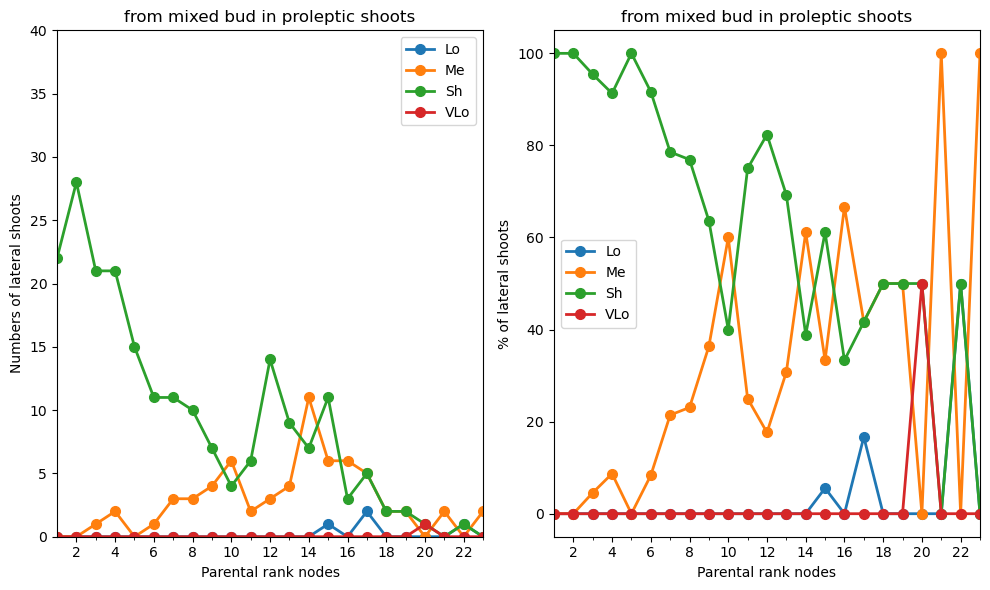

In [38]:
Lateral_buds.developinprol(fromV_matrix,fromV_freq, "mixed", (1,23), (0,40))

In [39]:
# Create frequency table of combination lateral child in proleptic shoots per each rank node
new_MV = pd.DataFrame(columns=['shoot_ID', 'rank_node', 'class'])

shoot_ids = MV_bud_PRO['shoot_ID'].unique()
rank_nodes = MV_bud_PRO['rank_node'].unique()

for i in shoot_ids:
    for j in rank_nodes:
        m = MV_bud_PRO[(MV_bud_PRO['shoot_ID'] == i) & (MV_bud_PRO['rank_node'] == j)]['length_newshoots']
        if not m.empty:
            class_combination = '+'.join(m.dropna().astype(str))
            new_row = pd.DataFrame({'shoot_ID': [i], 'rank_node': [j], 'class': [class_combination]})
            new_MV = pd.concat([new_MV, new_row], ignore_index=True)

new_MV['rank_node'] = pd.to_numeric(new_MV['rank_node'])
new_MV = new_MV[new_MV['class'] != '']
new_MV = new_MV.sort_values(by='rank_node')
print(new_MV.head())

    shoot_ID  rank_node class
225       27          1    Sh
553       86          1    Sh
537       83          1    Sh
504       75          1    Sh
233       29          1    Sh


In [40]:
new_class = pd.crosstab(new_MV['class'], new_MV['rank_node'])
print(new_class.head())

rank_node  1   2   3   4   5   6   7   8   9   10  ...  14  15  16  17  18  \
class                                              ...                       
Lo          0   0   0   0   0   0   0   0   0   0  ...   0   1   0   1   1   
Me          0   1   1   1   0   1   4   5   4   6  ...  10   6   7   4   2   
Me+Me       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
Me+Sh+Lo    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   1   0   
Me+Sh+Me    0   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   0   

rank_node  19  20  21  22  23  
class                          
Lo          0   0   0   1   0  
Me          2   1   2   0   0  
Me+Me       0   0   0   0   1  
Me+Sh+Lo    0   0   0   0   0  
Me+Sh+Me    0   0   0   0   0  

[5 rows x 23 columns]


In [41]:
# Create relative frequency table
new_class_freq = new_class.div(new_class.sum(axis=1), axis=0) * 100
print(new_class_freq.head())

rank_node   1         2         3         4    5         6         7   \
class                                                                   
Lo         0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
Me         0.0  1.428571  1.428571  1.428571  0.0  1.428571  5.714286   
Me+Me      0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
Me+Sh+Lo   0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
Me+Sh+Me   0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   

rank_node        8         9         10  ...          14         15    16  \
class                                    ...                                
Lo         0.000000  0.000000  0.000000  ...    0.000000  25.000000   0.0   
Me         7.142857  5.714286  8.571429  ...   14.285714   8.571429  10.0   
Me+Me      0.000000  0.000000  0.000000  ...    0.000000   0.000000   0.0   
Me+Sh+Lo   0.000000  0.000000  0.000000  ...    0.000000   0.000000   0.0   
Me+Sh+Me   0.000000  0.000

In [103]:
# Create the frequency table
new_class = pd.crosstab(bud_proleptic['length_newshoots'], bud_proleptic['rank_node'])

# Calculate relative frequencies
new_class_freq = new_class.div(new_class.sum(axis=1), axis=0) * 100
new_class_freq_matrix = new_class_freq.round(2)

# Add row and column sums
new_class_matrix = new_class.copy()
new_class_matrix['sum_child'] = new_class_matrix.sum(axis=1)
new_class_matrix.loc['Sums'] = new_class_matrix.sum()
new_class_matrix['freq_class'] = bud_proleptic['length'].value_counts().sort_index()
new_class_matrix['tot_parental_buds'] = bud_proleptic['length'].value_counts().sort_index().sum()
new_class_matrix['parental_M_V'] = bud_proleptic[bud_proleptic['fate'].isin(['V', 'M'])]['length'].value_counts().sort_index().sum()

# Display the table
print(new_class_matrix.head())

rank_node          1   2   3   4   5   6   7   8   9  10  ...  18  19  20  21  \
length_newshoots                                          ...                   
Lo                 0   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   
Me                 0   1   1   2   0   1   4   5   4   6  ...   2   2   1   2   
Sh                39  51  45  50  40  46  37  38  39  35  ...   5   3   2   0   
VLo                0   0   0   0   0   0   0   0   0   0  ...   0   0   1   0   
Sums              39  52  46  52  40  47  41  43  43  41  ...   8   5   4   2   

rank_node         22  23  sum_child  freq_class  tot_parental_buds  \
length_newshoots                                                     
Lo                 1   0          5         NaN                924   
Me                 0   2         77         NaN                924   
Sh                 1   0        601         NaN                924   
VLo                0   0          1         NaN                924   
Sums        

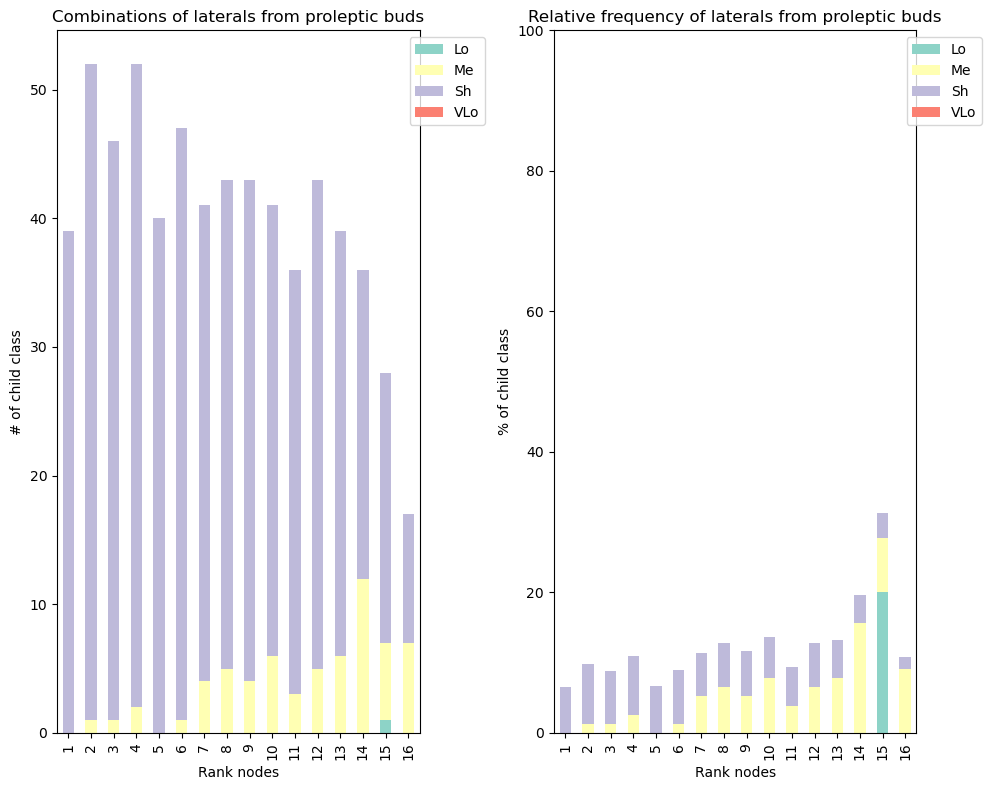

In [104]:
Lateral_buds.lengthlat(new_class, new_class_freq)

In [44]:
bud_proleptic.columns

Index(['tesi', 'unit', 'length', 'unit_2', 'diam', 'class', 'shoot_ID', 'tree',
       'Length(node)', 'rank_node', 'median_distance',
       'abs_norm_median_distance', 'abs_median_distance', 'c', 'v', 'm', 'cl',
       'nu', 'b', 'tot_buds_m.v.b.c', 'siblings_mv', 'fate', 'shoot_type',
       'nb_new_shoots', 'unit_3', 'length2yo', 'length_newshoots',
       'nb_nodes_new', 'c_new', 'v_new', 'm_new', 'cic_new', 'cl_new',
       'nu_new', 'b_new', 'tot_buds_m+v+b+c', 'norm_median_distance',
       'binned'],
      dtype='object')

In [45]:
# Create the frequency table
new_class = pd.crosstab(bud_proleptic['class'], bud_proleptic['length_newshoots'])

# Calculate relative frequencies
new_class_freq = new_class.div(new_class.sum(axis=1), axis=0) * 100
new_class_freq_matrix = new_class_freq.round(2)

# Add row and column sums
new_class_matrix = new_class.copy()
new_class_matrix['sum_child'] = new_class_matrix.sum(axis=1)
new_class_matrix.loc['Sums'] = new_class_matrix.sum()
new_class_matrix['freq_class'] = bud_proleptic['length'].value_counts().sort_index()
new_class_matrix['tot_parental_buds'] = bud_proleptic['length'].value_counts().sort_index().sum()
new_class_matrix['parental_M_V'] = bud_proleptic[bud_proleptic['fate'].isin(['V', 'M'])]['length'].value_counts().sort_index().sum()

# Custom order for parent lengths
parent_order = ['Sh', 'Me', 'Lo', 'VLo']
new_shoot_order = ['Sh', 'Me', 'Lo', 'VLo']

# Reorder the DataFrame according to the custom orders
new_class_freq_matrix = new_class_freq_matrix.reindex(index=parent_order, columns=new_shoot_order)


# Display the table
print(new_class_matrix. head())
print(new_class_freq_matrix. head())

length_newshoots  Lo  Me   Sh  VLo  sum_child  freq_class  tot_parental_buds  \
class                                                                          
Lo                 1  19  207    0        227         NaN                924   
Me                 0   4   73    0         77         NaN                924   
Sh                 0   4   47    0         51         NaN                924   
VLo                4  50  274    1        329         NaN                924   
Sums               5  77  601    1        684         NaN                924   

length_newshoots  parental_M_V  
class                           
Lo                         800  
Me                         800  
Sh                         800  
VLo                        800  
Sums                       800  
length_newshoots     Sh     Me    Lo  VLo
class                                    
Sh                92.16   7.84  0.00  0.0
Me                94.81   5.19  0.00  0.0
Lo                91.19   8.37  0.44  0.

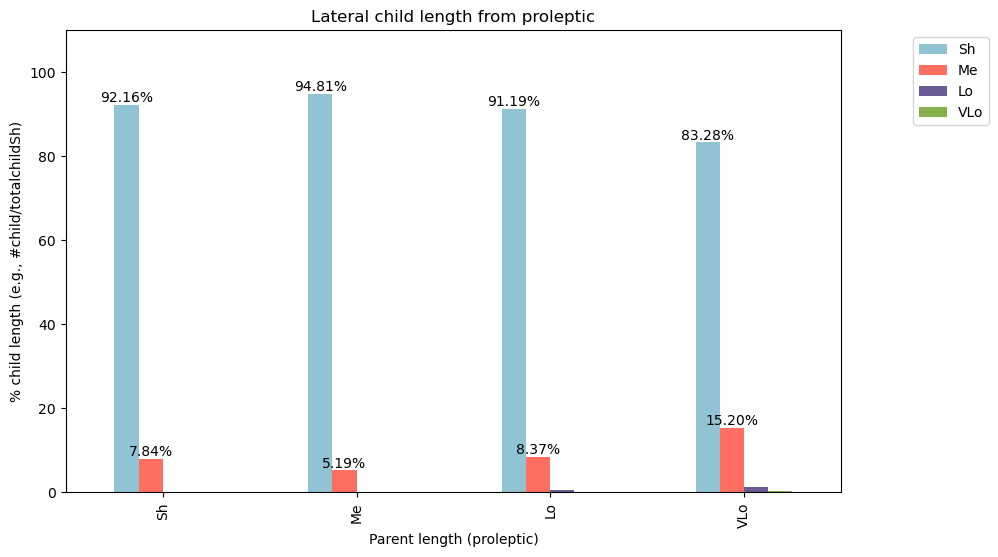

In [46]:
# Plot the relative frequency with annotations
Lateral_buds.lenprol(new_class_freq_matrix, ["Sh", "Me"])

### AIM9: Multiple shoots

In [47]:
# Filter for V buds and multiple V buds
V_bud_PRO = new_shoots[new_shoots['fate'] == 'V']
V_multiple = V_bud_PRO[(V_bud_PRO['v'] != 0) & (V_bud_PRO['m'] == 0)]

In [48]:
# Filter for M buds and multiple M buds
M_bud_PRO = new_shoots[new_shoots['fate'] == 'M']
M_multiple = M_bud_PRO[M_bud_PRO['siblings_mv'] != 0]

In [49]:
# Generate frequency table for M buds
new_class_m = Lateral_buds.generate_frequency_table(M_multiple)
print(new_class_m.head())

# Generate frequency table for V buds
new_class_v = Lateral_buds.generate_frequency_table(V_multiple)
print(new_class_v.head())

rank_node  3   4   5   6   7   8   9   11  13  14  15
class                                                
Me          0   0   0   0   0   0   0   0   1   0   0
Sh          1   5   4   1   3   1   1   1   2   3   2
Sh+Sh       0   0   1   3   0   0   0   0   0   0   0
rank_node  2   3   4   5   10  14  15  16  17  18  19  20  23
class                                                        
Lo          0   0   0   0   0   0   0   0   1   0   0   0   0
Me          0   0   0   0   1   1   1   2   2   2   1   0   0
Me+Me       0   0   0   0   0   0   0   0   0   0   0   0   1
Me+Sh+Lo    0   0   0   0   0   0   0   0   1   0   0   0   0
Me+Sh+Me    0   0   0   0   0   1   0   0   0   0   0   0   0


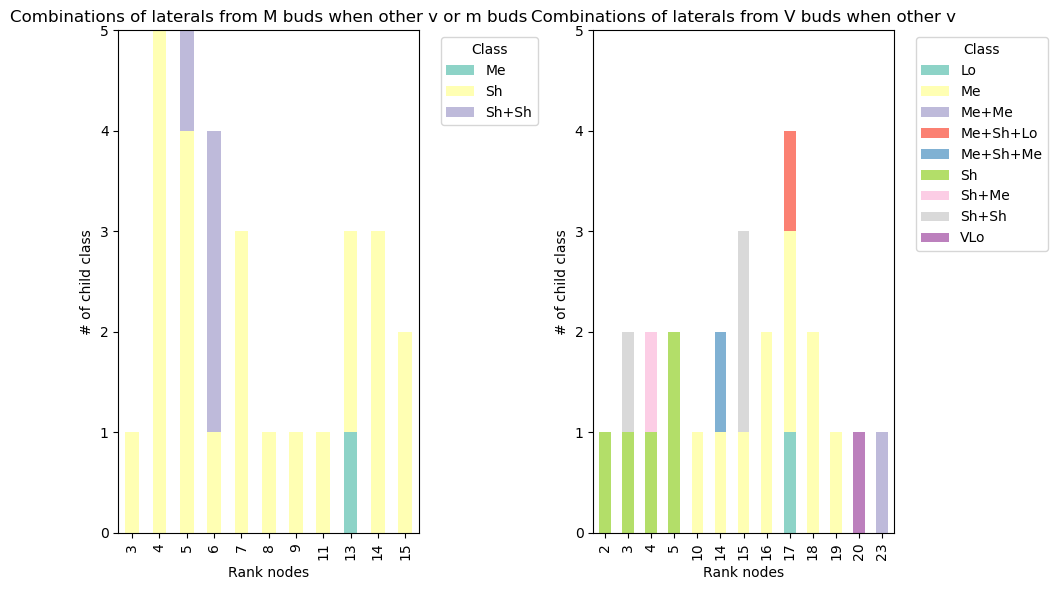

In [50]:
# Plot the two frequency tables side by side
Lateral_buds.plot_frequency_tables_side_by_side(
    new_class_m, "Combinations of laterals from M buds when other v or m buds", "# of child class",
    new_class_v, "Combinations of laterals from V buds when other v", "# of child class"
)

## SYLLEPTIC SHOOT TYPE

###  AIM2: NB of observations (buds) in sylleptic 1yo shoots per CLASS LENGHT 

In [51]:
class_summary = Lateral_buds.calculate_class_summary(met_sylleptic, 'class', ["v_syl", "m_syl"])
# Define the custom order for 'class'
class_order = ['Sh', 'Me', 'Lo', 'VLo']

# Create a categorical type with the custom order
class_summary['class'] = pd.Categorical(class_summary['class'], categories=class_order, ordered=True)

# Sort the DataFrame by 'class' according to the categorical order
class_summary = class_summary.sort_values('class')
print(class_summary)

  class  v_syl  m_syl  Total     %v_syl     %m_syl
3    Sh     15     12     27  55.555556  44.444444
2    Me     48     63    111  43.243243  56.756757
1    Lo    109     85    194  56.185567  43.814433
0   VLo    100     90    190  52.631579  47.368421



Testing column: %v_syl
Comparison between 3 and 2: p-value = 1.1376051851097594e-57
Comparison between 3 and 1: p-value = nan
Comparison between 3 and 0: p-value = nan
Comparison between 2 and 1: p-value = 1.0137151391582219e-131
Comparison between 2 and 0: p-value = 5.052393629516596e-11
Comparison between 1 and 0: p-value = nan

Testing column: %m_syl
Comparison between 3 and 2: p-value = nan
Comparison between 3 and 1: p-value = nan
Comparison between 3 and 0: p-value = nan
Comparison between 2 and 1: p-value = nan
Comparison between 2 and 0: p-value = nan
Comparison between 1 and 0: p-value = nan


C:\Users\franc\miniconda3\lib\site-packages\statsmodels\stats\weightstats.py:792: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std


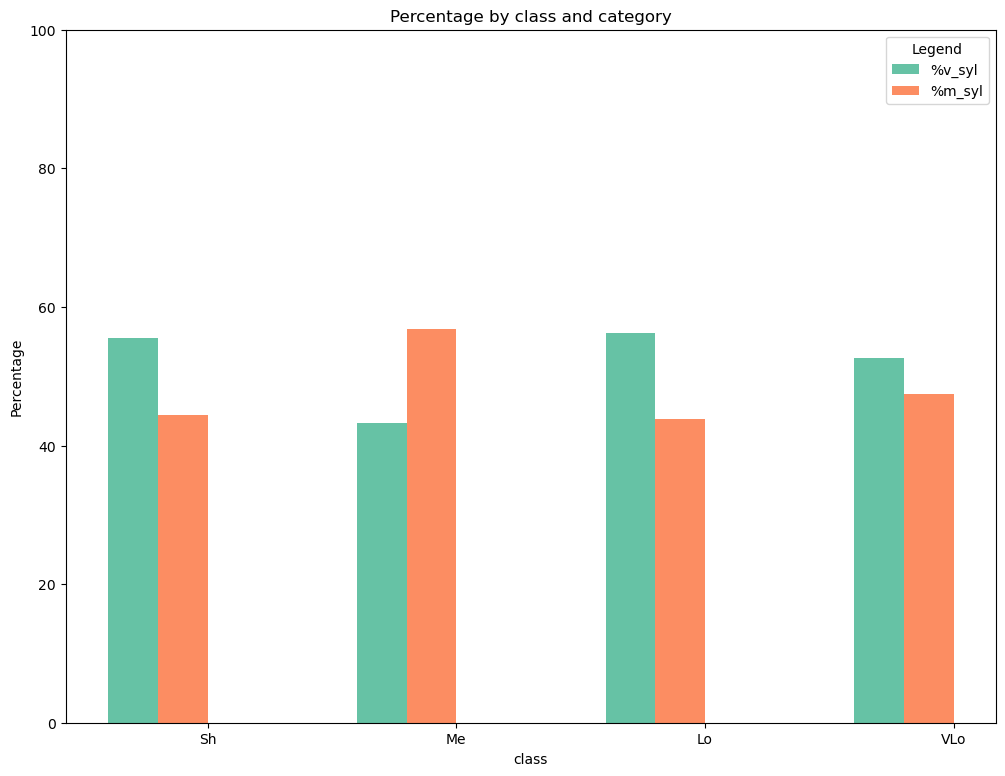

In [54]:
# 2_PRO_freq_obs~class
Lateral_buds.plot_and_test(class_summary, row_slice=slice(0,4), col_slice=slice(4,6), obs_col_index=5,
               plot_title='Nb Lateral Buds', xlabel='class', ylabel='Percentage', ymax = 100)

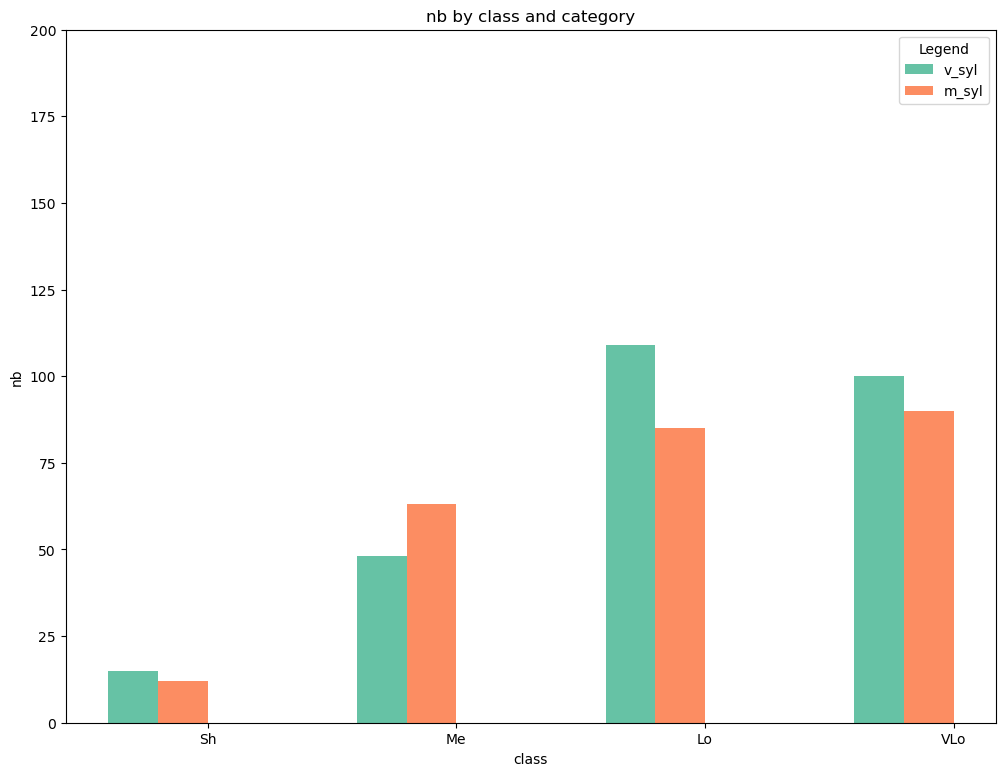

In [55]:
# 2_PRO_nb_obs~class
Lateral_buds.plot_and_test(class_summary, row_slice=slice(0,4), col_slice=slice(1,3), obs_col_index=5,
               plot_title='Nb Lateral Buds', xlabel='class', ylabel='nb', ymax = 200, test = False)

In [56]:
# Assuming the 'Total' column should be the sum of the previous four columns
class_summary.loc['Sum'] = class_summary.iloc[:, 1:].sum(axis=0)
print(class_summary)
relative_frequency = class_summary.iloc[4:,1:3] / class_summary.loc['Sum', 'Total']*100
print(relative_frequency)
class_summary.iloc[4:,4:6] = relative_frequency

    class  v_syl  m_syl  Total      %v_syl      %m_syl
3      Sh   15.0   12.0   27.0   55.555556   44.444444
2      Me   48.0   63.0  111.0   43.243243   56.756757
1      Lo  109.0   85.0  194.0   56.185567   43.814433
0     VLo  100.0   90.0  190.0   52.631579   47.368421
Sum   NaN  272.0  250.0  522.0  207.615945  192.384055
        v_syl     m_syl
Sum  52.10728  47.89272


C:\Users\franc\AppData\Local\Temp\ipykernel_12280\613639444.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  class_summary.loc['Sum'] = class_summary.iloc[:, 1:].sum(axis=0)


In [57]:
df_plot = class_summary.iloc[4:,4:6]
df_plot = df_plot.T
print(df_plot)

             Sum
%v_syl  52.10728
%m_syl  47.89272


C:\Users\franc\Desktop\Ricerca\Progetti\L-HAZELNUT\L-HAZELNUT\Cultivars\TondaGiffoniOR\Scripts\Exploratory_analyses\../../../../Scripts\Lateral_buds.ipynb:293: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x[i], df.iloc[i,:] + 3, f"{round(df.iloc[i,:][0],2)}", ha='center')
C:\Users\franc\miniconda3\lib\site-packages\matplotlib\text.py:825: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
C:\Users\franc\miniconda3\lib\site-packages\matplotlib\text.py:685: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(textobj.convert_yunits(textobj._y))


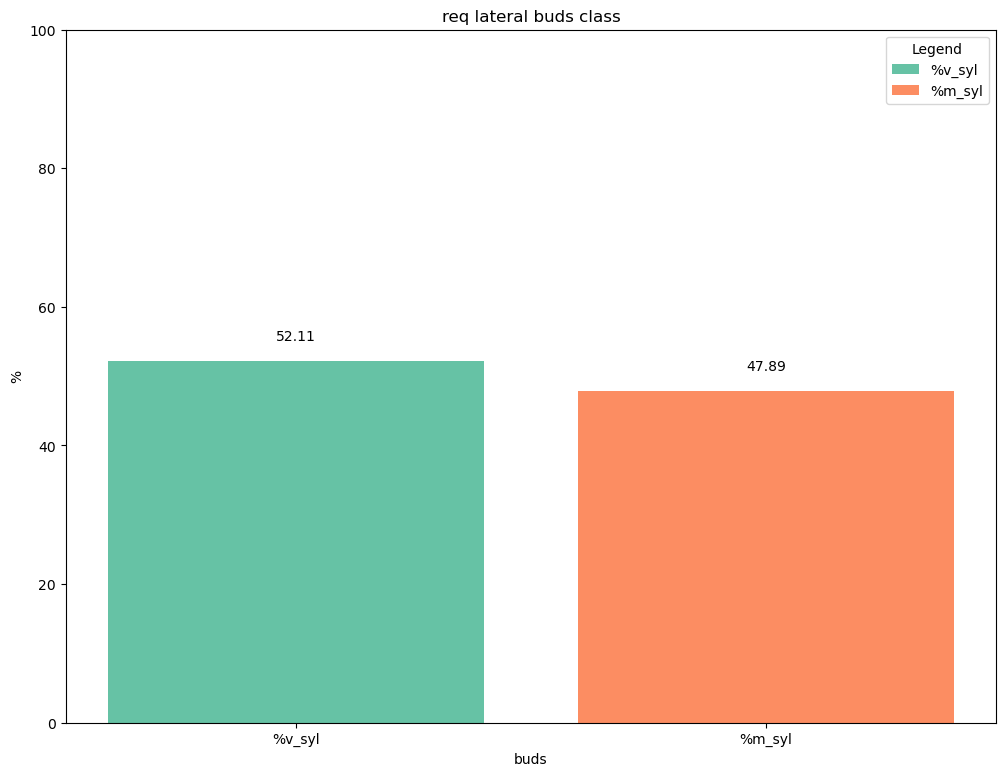

In [58]:
# PRO_nb_obs
Lateral_buds.barplot_annotation(df_plot, "buds", "req lateral buds class")

### AIM4: SUM of observations (mv buds) in sylleptic

In [59]:
freq_rank = pd.crosstab(index=met_sylleptic['parent_rank_node'], columns=met_sylleptic['tot_buds_syl_m_v'])

freq_rank.head()

tot_buds_syl_m_v,0,1,2,3,4,5,6,7
parent_rank_node,,,,,,,,
1,3,0,0,0,0,0,0,0
2,2,5,2,0,2,0,0,0
3,3,5,6,4,1,0,0,0
4,3,6,8,6,1,0,1,0
5,1,5,8,21,4,7,0,0


<Figure size 1200x900 with 0 Axes>

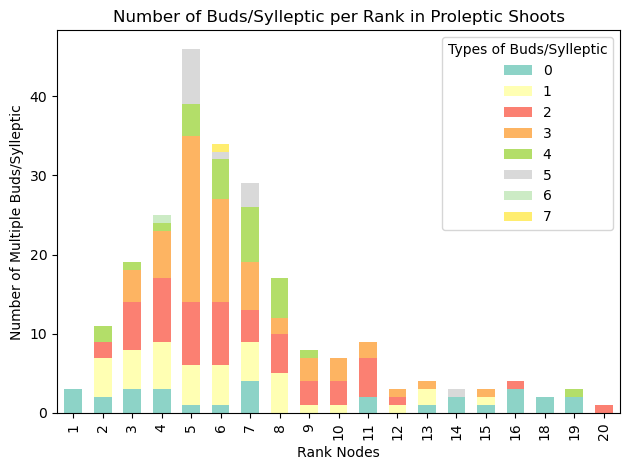

In [60]:
# Create colormap for the bar chart
num_colors = len(freq_rank.columns)
set3_colors = plt.cm.get_cmap('Set3', num_colors)  # Get colors from Set3
colors = set3_colors(np.linspace(0, 1, num_colors))  # Evenly space color pick

Lateral_buds.plot_stacked_barchart(freq_rank, colors)

In [61]:
rel_freq_rank = (freq_rank.div(freq_rank.sum(axis=1), axis=0) * 100).fillna(0)
rel_freq_rank.head()

tot_buds_syl_m_v,0,1,2,3,4,5,6,7
parent_rank_node,,,,,,,,
1,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,18.181818,45.454545,18.181818,0.000000,18.181818,0.000000,0.0,0.0
3,15.789474,26.315789,31.578947,21.052632,5.263158,0.000000,0.0,0.0
4,12.000000,24.000000,32.000000,24.000000,4.000000,0.000000,4.0,0.0
5,2.173913,10.869565,17.391304,45.652174,8.695652,15.217391,0.0,0.0


<Figure size 1200x900 with 0 Axes>

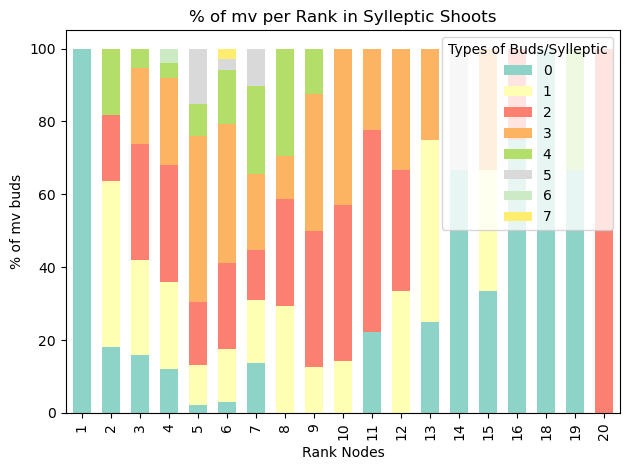

In [62]:
Lateral_buds.plot_stacked_barchart(rel_freq_rank,colors,
                      title="% of mv per Rank in Sylleptic Shoots", xlabel="Rank Nodes", ylabel="% of mv buds")

In [63]:
met_sylleptic.columns

Index(['tesi', 'unit', 'parent_length_cm', 'unit_2', 'diam', 'class',
       'shoot_ID', 'tree', 'parent_length_node', 'parent_rank_node',
       'median_distance', 'norm_median_distance', 'abs_norm_median_distance',
       'abs_median_distance', 'sylleptic', 'v', 'm', 'cl', 'nu', 'b',
       'tot_buds_mvb', 'tot_buds_mv', 'shoot_type', 'nb_new_shoots', 'c_syl',
       'v_syl', 'm_syl', 'tot_buds_syl_m_v'],
      dtype='object')

In [64]:
tot = ["c_syl", "v_syl", "m_syl", "b"]
print(met_sylleptic[tot])

     c_syl  v_syl  m_syl  b
0        1      0      2  0
1        1      1      0  0
2        1      0      3  0
3        1      1      1  0
4        1      1      2  0
..     ...    ...    ... ..
226      1      0      1  0
227      1      2      1  0
228      1      0      0  0
229      1      1      3  0
230      1      1      3  0

[231 rows x 4 columns]


In [65]:
frequency_table = Lateral_buds.process_and_tabulate(met_sylleptic, tot, "parent_rank_node")

<Figure size 1200x900 with 0 Axes>

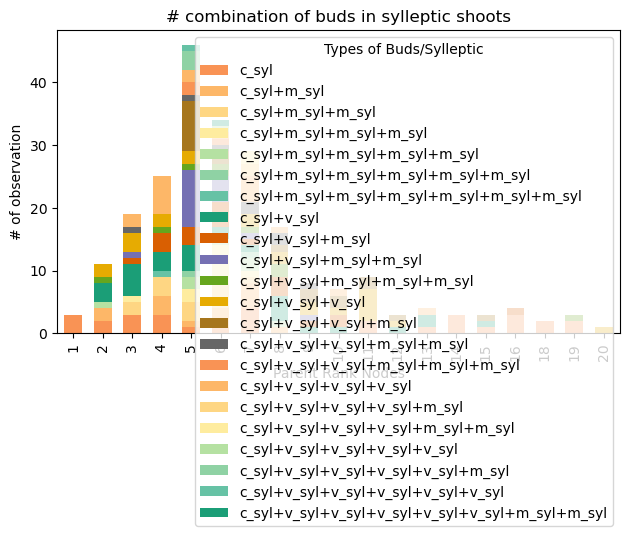

In [66]:
# Define custom colors by combining colors from different colormaps
spectral_colors = plt.get_cmap('Spectral')(np.linspace(0.2, 0.8, 11))  # Adjusted to get 11 colors and sliced
dark2_colors = plt.get_cmap('Dark2')(np.linspace(0, 1, 7))
# Custom selection and combination of colors from both palettes
colors = np.concatenate((spectral_colors[1:5], spectral_colors[8:11], dark2_colors[:7]))

Lateral_buds.plot_stacked_barchart(frequency_table,colors,
                      title="# combination of buds in sylleptic shoots", xlabel="Parent Rank Nodes", ylabel="# of observation")

In [67]:
contingency_table = pd.crosstab(met_sylleptic['parent_rank_node'], met_sylleptic['merge'])

# Step 2: Convert the counts to relative frequencies (percentages)
# Normalize row-wise by dividing each row by its sum and then multiply by 100
relative_frequencies = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

relative_frequencies.head()

merge,c_syl,c_syl+m_syl,c_syl+m_syl+m_syl,c_syl+m_syl+m_syl+m_syl,c_syl+m_syl+m_syl+m_syl+m_syl,c_syl+m_syl+m_syl+m_syl+m_syl+m_syl,c_syl+m_syl+m_syl+m_syl+m_syl+m_syl+m_syl,c_syl+v_syl,c_syl+v_syl+m_syl,c_syl+v_syl+m_syl+m_syl,...,c_syl+v_syl+v_syl+m_syl,c_syl+v_syl+v_syl+m_syl+m_syl,c_syl+v_syl+v_syl+m_syl+m_syl+m_syl,c_syl+v_syl+v_syl+v_syl,c_syl+v_syl+v_syl+v_syl+m_syl,c_syl+v_syl+v_syl+v_syl+m_syl+m_syl,c_syl+v_syl+v_syl+v_syl+v_syl,c_syl+v_syl+v_syl+v_syl+v_syl+m_syl,c_syl+v_syl+v_syl+v_syl+v_syl+v_syl,c_syl+v_syl+v_syl+v_syl+v_syl+v_syl+m_syl+m_syl
parent_rank_node,,,,,,,,,,,,,,,,,,,,,
1,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
2,18.181818,18.181818,0.000000,0.000000,9.090909,0.000000,0.0,27.272727,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
3,15.789474,0.000000,10.526316,5.263158,0.000000,0.000000,0.0,26.315789,5.263158,5.263158,...,0.000000,5.263158,0.000000,10.526316,0.0,0.0,0.0,0.000000,0.000000,0.0
4,12.000000,12.000000,12.000000,0.000000,0.000000,0.000000,4.0,12.000000,12.000000,0.000000,...,0.000000,0.000000,0.000000,24.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
5,2.173913,2.173913,6.521739,4.347826,4.347826,2.173913,0.0,8.695652,6.521739,19.565217,...,17.391304,2.173913,4.347826,4.347826,0.0,0.0,0.0,6.521739,2.173913,0.0


<Figure size 1200x900 with 0 Axes>

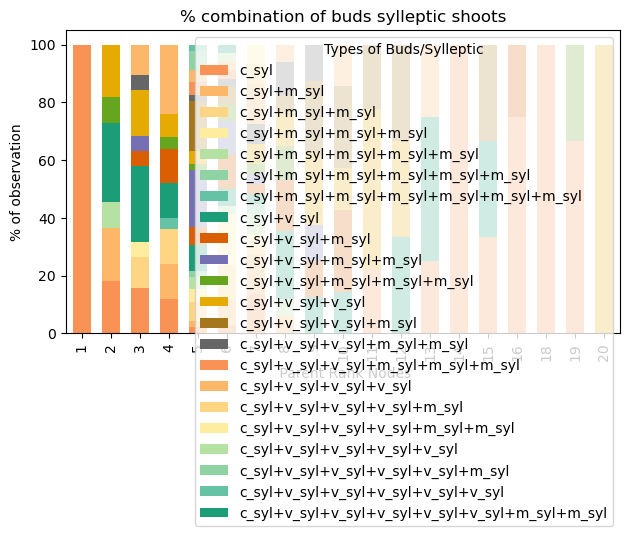

In [63]:
Lateral_buds.plot_stacked_barchart(relative_frequencies,colors,
                      title="% combination of buds sylleptic shoots", xlabel=" Parent Rank Nodes", ylabel="% of observation")

### AIM7: Proportion of buds that sprout into shoots

In [68]:
contingency_table = pd.crosstab(index=[MV_bud_SYL['parent_rank_node'], MV_bud_SYL['fate']], columns=MV_bud_SYL['nb_new_shoots'])

# Filter to get rows where fate is 'M'
from_M = contingency_table.xs('M', level='fate')
from_V = contingency_table.xs('V', level='fate')

# Calculate relative frequencies per rank node for each fate
from_M_freq = from_M.div(from_M.sum(axis=1), axis=0)
from_V_freq = from_V.div(from_V.sum(axis=1), axis=0)

In [69]:
from_M_freq = from_M_freq[1]*100  # Extract the column for nb_new_shoots=1
from_V_freq = from_V_freq[1]*100  # Extract the column for nb_new_shoots=1

In [70]:
# Combine the frequencies into a single DataFrame
from_MV_freq = pd.DataFrame({'V': from_V_freq, 'M': from_M_freq})

# Reset index to make 'rank_node' and 'nb_new_shoots' regular columns
from_MV_freq.reset_index(inplace=True)

# Print the resulting frequency matrix
print(from_MV_freq.head())

   parent_rank_node          V          M
0                 2  62.500000  33.333333
1                 3  52.380952  41.666667
2                 4  55.172414  42.857143
3                 5  59.090909  44.927536
4                 6  68.750000  50.000000


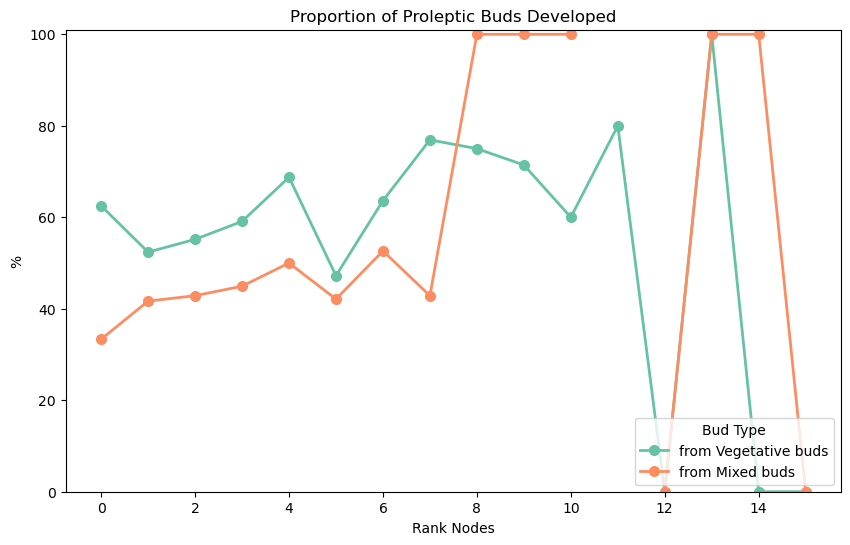

In [71]:
Lateral_buds.plot_bud_development(from_MV_freq)

### AIM8: Length of new shoots

In [72]:
# Filter rows where nb_new_shoots is not equal to 0
new_shoots = MV_bud_SYL[MV_bud_SYL['nb_new_shoots'] != 0]
# Create a frequency table
new_shoots_rank = pd.crosstab([new_shoots['parent_rank_node'], new_shoots['length_newshoots']], new_shoots['fate'])

print(new_shoots_rank.head())

fate                                M   V
parent_rank_node length_newshoots        
2                Sh                 3   5
3                Sh                 5  11
4                Sh                 9  16
5                Me                 1   1
                 Sh                30  38


In [73]:
# Developed from V
fromV = new_shoots_rank.loc[:, 'V']
fromV_matrix = fromV.unstack().fillna(0)
# Calculate the relative frequency table
fromV_freq = fromV_matrix.div(fromV_matrix.sum(axis=1), axis=0) * 100

print("matrix:\n",fromV_matrix.head())
print("\n relative freq:\n", fromV_freq.head())

matrix:
 length_newshoots   Me    Sh
parent_rank_node           
2                 0.0   5.0
3                 0.0  11.0
4                 0.0  16.0
5                 1.0  38.0
6                 2.0  20.0

 relative freq:
 length_newshoots        Me          Sh
parent_rank_node                      
2                 0.000000  100.000000
3                 0.000000  100.000000
4                 0.000000  100.000000
5                 2.564103   97.435897
6                 9.090909   90.909091


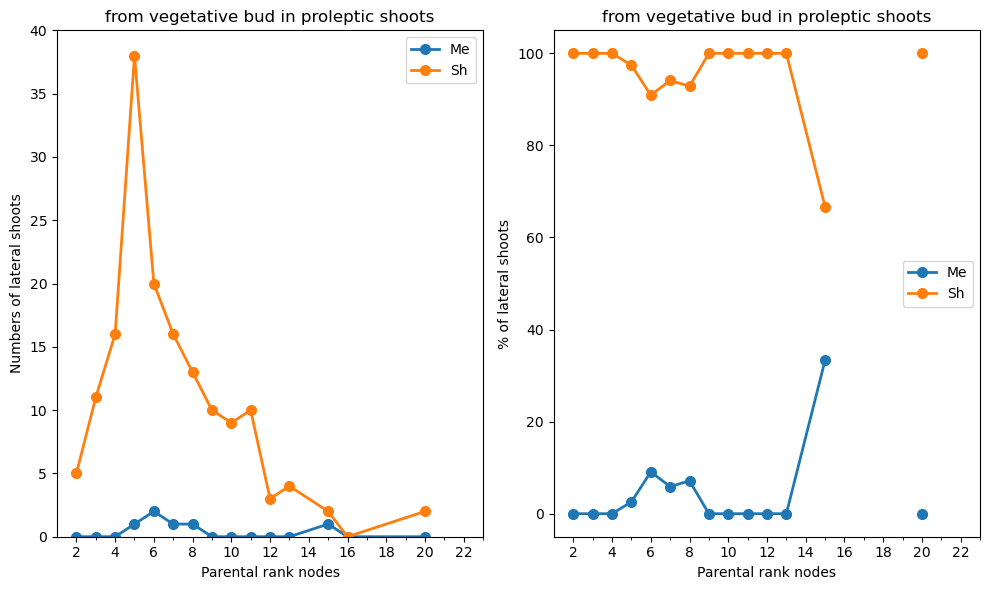

In [74]:
Lateral_buds.developinprol(fromV_matrix,fromV_freq,"vegetative" ,(1,23), (0,40))

In [75]:
# Developed from M
fromM = new_shoots_rank.loc[:, 'M']
fromM_matrix = fromM.unstack().fillna(0)
# Calculate the relative frequency table
fromM_freq = fromM_matrix.div(fromM_matrix.sum(axis=1), axis=0) * 100

print("matrix:\n",fromM_matrix.head())
print("\n relative freq:\n", fromM_freq.head())

matrix:
 length_newshoots   Me    Sh
parent_rank_node           
2                 0.0   3.0
3                 0.0   5.0
4                 0.0   9.0
5                 1.0  30.0
6                 3.0  27.0

 relative freq:
 length_newshoots         Me          Sh
parent_rank_node                       
2                  0.000000  100.000000
3                  0.000000  100.000000
4                  0.000000  100.000000
5                  3.225806   96.774194
6                 10.000000   90.000000


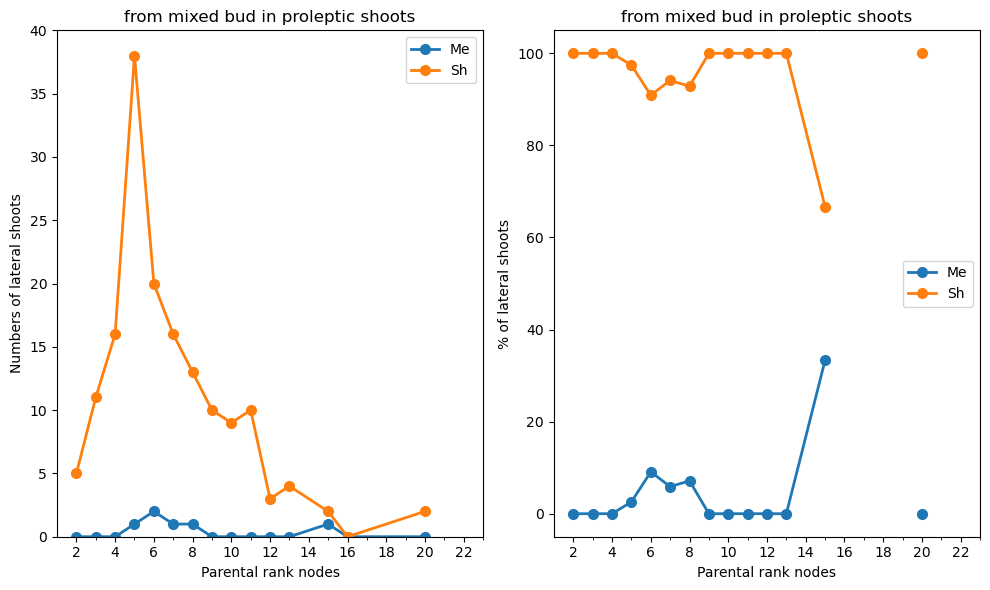

In [76]:
Lateral_buds.developinprol(fromV_matrix,fromV_freq, "mixed", (1,23), (0,40))

In [78]:
# Create frequency table of combination lateral child in proleptic shoots per each rank node
new_MV = pd.DataFrame(columns=['shoot_ID', 'parent_rank_node', 'class'])

shoot_ids = MV_bud_SYL['shoot_ID'].unique()
rank_nodes = MV_bud_SYL['parent_rank_node'].unique()

for i in shoot_ids:
    for j in rank_nodes:
        m = MV_bud_SYL[(MV_bud_SYL['shoot_ID'] == i) & (MV_bud_SYL['parent_rank_node'] == j)]['length_newshoots']
        if not m.empty:
            class_combination = '+'.join(m.dropna().astype(str))
            new_row = pd.DataFrame({'shoot_ID': [i], 'parent_rank_node': [j], 'class': [class_combination]})
            new_MV = pd.concat([new_MV, new_row], ignore_index=True)

new_MV['parent_rank_node'] = pd.to_numeric(new_MV['parent_rank_node'])
new_MV = new_MV[new_MV['class'] != '']
new_MV = new_MV.sort_values(by='parent_rank_node')
print(new_MV.head())

    shoot_ID  parent_rank_node  class
69        36                 2  Sh+Sh
24        13                 2     Sh
100       58                 2     Sh
63        31                 2     Sh
51        27                 2  Sh+Sh


In [80]:
new_class = pd.crosstab(new_MV['class'], new_MV['parent_rank_node'])
print(new_class.head())

parent_rank_node  2   3   4   5   6   7   8   9   10  11  12  13  15  16  20
class                                                                       
Me                 0   0   0   0   3   0   1   0   0   0   0   0   0   0   0
Me+Sh              0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
Sh                 4  10  13  13  12  11   7   4   2   3   1   2   1   1   0
Sh+Me              0   0   0   1   1   1   0   0   1   0   0   0   0   0   0
Sh+Me+Sh           0   0   0   0   0   0   0   0   0   0   0   0   1   0   0


In [81]:
# Create relative frequency table
new_class_freq = new_class.div(new_class.sum(axis=1), axis=0) * 100
print(new_class_freq.head())

parent_rank_node        2          3         4          5          6   \
class                                                                   
Me                0.000000   0.000000   0.00000    0.00000  75.000000   
Me+Sh             0.000000   0.000000   0.00000  100.00000   0.000000   
Sh                4.761905  11.904762  15.47619   15.47619  14.285714   
Sh+Me             0.000000   0.000000   0.00000   25.00000  25.000000   
Sh+Me+Sh          0.000000   0.000000   0.00000    0.00000   0.000000   

parent_rank_node         7          8         9          10        11  \
class                                                                   
Me                 0.000000  25.000000  0.000000   0.000000  0.000000   
Me+Sh              0.000000   0.000000  0.000000   0.000000  0.000000   
Sh                13.095238   8.333333  4.761905   2.380952  3.571429   
Sh+Me             25.000000   0.000000  0.000000  25.000000  0.000000   
Sh+Me+Sh           0.000000   0.000000  0.000000  

In [84]:
print(bud_sylleptic.columns)

Index(['tesi', 'unit', 'parent_length_cm', 'unit_2', 'diam', 'class',
       'shoot_ID', 'tree', 'parent_length_node', 'parent_rank_node',
       'median_distance', 'norm_median_distance', 'abs_norm_median_distance',
       'abs_median_distance', 'c', 'v', 'm', 'cl', 'nu', 'b',
       'tot_buds_m.v.b.c', 'siblings_mv', 'fate', 'shoot_type',
       'nb_new_shoots', 'unit_3', 'length2yo', 'length_newshoots',
       'nb_nodes_new', 'c_new', 'v_new', 'm_new', 'cic_new', 'cl_new',
       'nu_new', 'b_new', 'tot_buds_m+v+b+c'],
      dtype='object')


In [96]:
# Create the frequency table
new_class = pd.crosstab(bud_sylleptic['length_newshoots'], bud_sylleptic['parent_rank_node'])

# Calculate relative frequencies
new_class_freq = new_class.div(new_class.sum(axis=1), axis=0) * 100
new_class_freq_matrix = new_class_freq.round(2)

In [97]:
# Add row and column sums
new_class_matrix = new_class.copy()
new_class_matrix['sum_child'] = new_class_matrix.sum(axis=1)
new_class_matrix.loc['Sums'] = new_class_matrix.sum()
new_class_matrix['freq_class'] = bud_proleptic['length'].value_counts().sort_index()
new_class_matrix['tot_parental_buds'] = bud_proleptic['length'].value_counts().sort_index().sum()
new_class_matrix['parental_M_V'] = bud_proleptic[bud_proleptic['fate'].isin(['V', 'M'])]['length'].value_counts().sort_index().sum()

# Display the table
print(new_class_matrix.head())

parent_rank_node  1   2   3   4   5   6   7   8   9  10  ...  13  15  16  18  \
length_newshoots                                         ...                   
Me                0   0   0   0   2   5   1   1   0   1  ...   0   1   0   0   
Sh                1  10  18  28  69  49  34  24  13  13  ...   4   5   2   1   
Sums              1  10  18  28  71  54  35  25  13  14  ...   4   6   2   1   

parent_rank_node  19  20  sum_child  freq_class  tot_parental_buds  \
length_newshoots                                                     
Me                 1   0         12         NaN                924   
Sh                 1   2        292         NaN                924   
Sums               2   2        304         NaN                924   

parent_rank_node  parental_M_V  
length_newshoots                
Me                         800  
Sh                         800  
Sums                       800  

[3 rows x 22 columns]


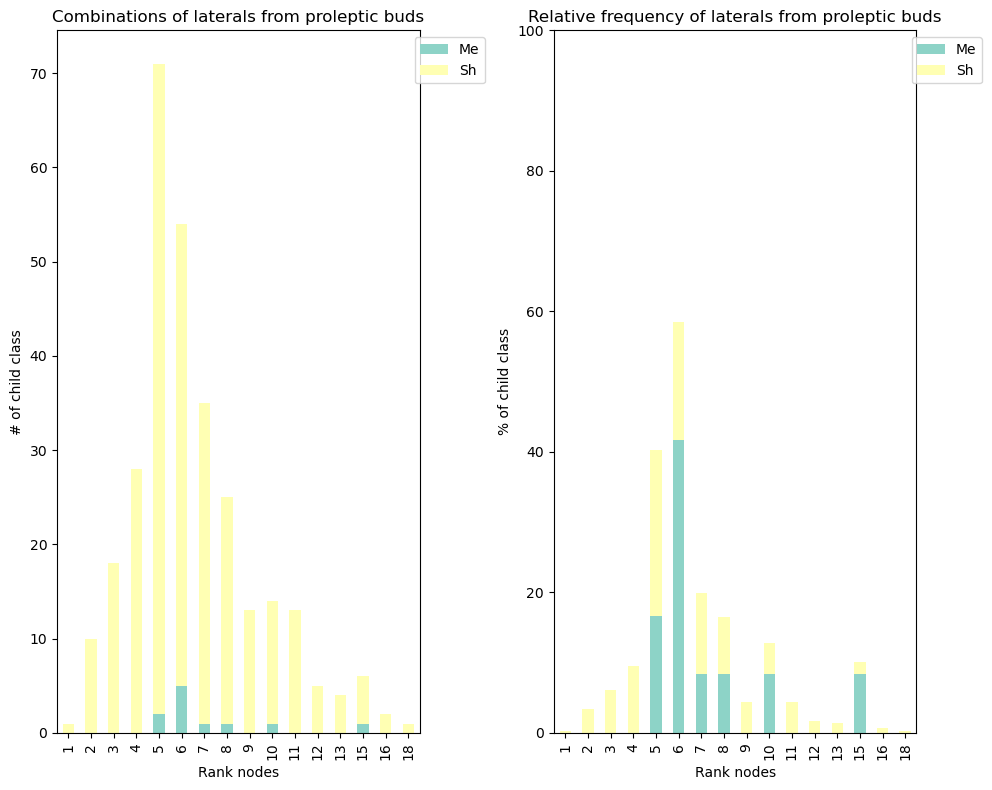

In [98]:
Lateral_buds.lengthlat(new_class, new_class_freq)

In [99]:
bud_proleptic.columns

Index(['tesi', 'unit', 'length', 'unit_2', 'diam', 'class', 'shoot_ID', 'tree',
       'Length(node)', 'rank_node', 'median_distance',
       'abs_norm_median_distance', 'abs_median_distance', 'c', 'v', 'm', 'cl',
       'nu', 'b', 'tot_buds_m.v.b.c', 'siblings_mv', 'fate', 'shoot_type',
       'nb_new_shoots', 'unit_3', 'length2yo', 'length_newshoots',
       'nb_nodes_new', 'c_new', 'v_new', 'm_new', 'cic_new', 'cl_new',
       'nu_new', 'b_new', 'tot_buds_m+v+b+c', 'norm_median_distance',
       'binned'],
      dtype='object')

In [100]:
# Create the frequency table
new_class = pd.crosstab(bud_proleptic['class'], bud_proleptic['length_newshoots'])

# Calculate relative frequencies
new_class_freq = new_class.div(new_class.sum(axis=1), axis=0) * 100
new_class_freq_matrix = new_class_freq.round(2)

# Add row and column sums
new_class_matrix = new_class.copy()
new_class_matrix['sum_child'] = new_class_matrix.sum(axis=1)
new_class_matrix.loc['Sums'] = new_class_matrix.sum()
new_class_matrix['freq_class'] = bud_proleptic['length'].value_counts().sort_index()
new_class_matrix['tot_parental_buds'] = bud_proleptic['length'].value_counts().sort_index().sum()
new_class_matrix['parental_M_V'] = bud_proleptic[bud_proleptic['fate'].isin(['V', 'M'])]['length'].value_counts().sort_index().sum()

# Custom order for parent lengths
parent_order = ['Sh', 'Me', 'Lo', 'VLo']
new_shoot_order = ['Sh', 'Me', 'Lo', 'VLo']

# Reorder the DataFrame according to the custom orders
new_class_freq_matrix = new_class_freq_matrix.reindex(index=parent_order, columns=new_shoot_order)


# Display the table
print(new_class_matrix. head())
print(new_class_freq_matrix. head())

length_newshoots  Lo  Me   Sh  VLo  sum_child  freq_class  tot_parental_buds  \
class                                                                          
Lo                 1  19  207    0        227         NaN                924   
Me                 0   4   73    0         77         NaN                924   
Sh                 0   4   47    0         51         NaN                924   
VLo                4  50  274    1        329         NaN                924   
Sums               5  77  601    1        684         NaN                924   

length_newshoots  parental_M_V  
class                           
Lo                         800  
Me                         800  
Sh                         800  
VLo                        800  
Sums                       800  
length_newshoots     Sh     Me    Lo  VLo
class                                    
Sh                92.16   7.84  0.00  0.0
Me                94.81   5.19  0.00  0.0
Lo                91.19   8.37  0.44  0.

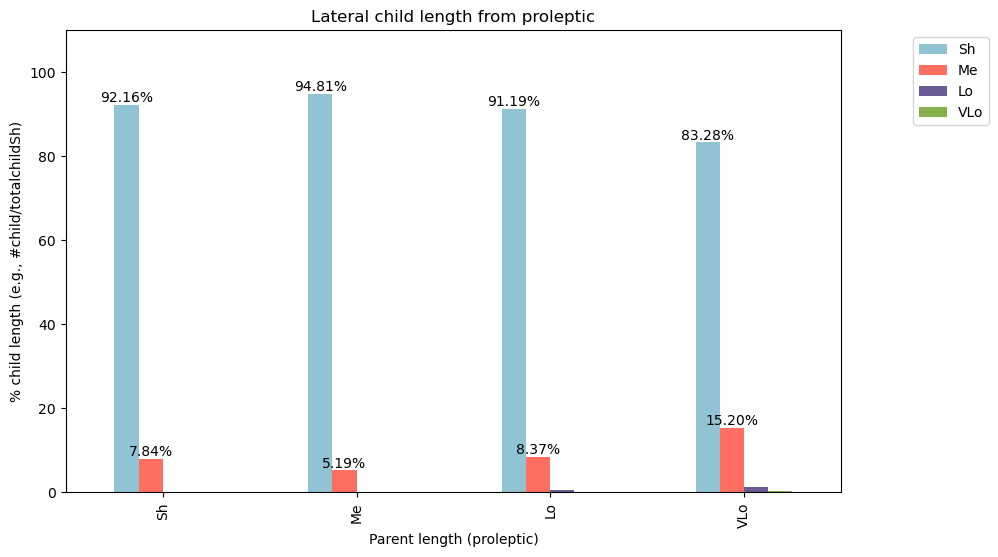

In [101]:
# Plot the relative frequency with annotations
Lateral_buds.lenprol(new_class_freq_matrix, ["Sh", "Me"])